# Loading DATA

In [1]:
import numpy as np 
import pandas as pd 
import random 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
                              "Dynamic\nPromo ID","Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]


## Converting object columns to numerical
def convert_to_float(x):
  if x=="" or x in numerical_convertible_columns:
    return 0
  return float(x.replace(',',''))

##Removing % sign from Gross Margin Column Data
def p2f(x):
  if x=='' or x == "Gross Margin " or x == "Gross Margin %":
    return 0
  temp = x.strip('%') if x[-1] == "%" else x
  return float(temp.replace(',',''))

##Removing $ or () sign from Actual-Retail Column Data
def dollar_to_float(x):
  if x=="" or x == "Actual-Retail" or x == "Dynamic\nPromo ID" or x == "Dynamic Promo ID":
    return 0
  temp = x.strip(')') if x[-1] == ")" else x
  temp = temp[1:]  if temp[0] == '(' else temp
  temp = temp[1:]  if temp[0] == '$' else temp
  if x[0] == "-":
    return -1* dollar_to_float(temp[1:])
  else:
    return float(temp.replace(',',''))

In [3]:
data1718 = pd.read_csv("costello_ace_2017-2018.csv", 
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data1718.shape

(17328044, 39)

In [5]:
data1718.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
17328039,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901105411,10541,"PALMYRA PUSHBROOM 18""",1.0,...,7.29,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,2.0,Sale,Category Price Plan,NaN
17328040,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901121725,12172,WIRE BRUSH MINI SS 3PK,1.0,...,3.78,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,3.0,Sale,Category Price Plan,NaN
17328041,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,41785997888,1455567,BRUSH SCRUB HANG-UP,1.0,...,1.56,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,4.0,Sale,Category Price Plan,NaN
17328042,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,8.2091E+11,2301166,CM SLIDE LOCK KNIFE,1.0,...,4.82,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,5.0,Sale,Category Price Plan,NaN
17328043,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [6]:
data1516 = pd.read_csv("costello_ace_2015-2016.csv", 
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

In [7]:
data1516.shape

(15627499, 39)

In [8]:
pd.set_option('display.max_columns',
              500)

data1516.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
15627494,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,51643061880,8009730,"CORD STRETCH 48"" HVY DTY",1.0,2.10,1.68,0.42,20.00,80,SPORTING GOODS,856,STRETCH CORDS/TARP STRAPS,85601,STRETCH CORDS/HOOKS,1.0,NaN,NaN,0.0,2.10,5.99,3.89,Y,Alternate Tender,3.89,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,1.0,Sale,Category Price Plan,NaN
15627495,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,82901731900,73190,TARP POLY BLUE/BRN 6X8,1.0,3.06,2.45,0.61,19.93,70,"LAWN, GARDEN & FARM SUPPLIES",774,TARPS,77401,POLY TARPS,1.0,NaN,NaN,0.0,3.06,7.99,4.93,Y,Alternate Tender,4.93,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,2.0,Sale,Category Price Plan,NaN
15627496,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,42854024986,1365527,SPRAYER ORBITAL 24 OZ,1.0,2.00,1.60,0.40,20.00,10,CLEANING SUPPLIES,105,GLASS/PLASTIC CLEANERS,10505,SPRAYERS,1.0,NaN,NaN,0.0,2.00,3.99,1.99,Y,Alternate Tender,1.99,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,3.0,Sale,Category Price Plan,NaN
15627497,9/30/2016,21:29:00,507179,B84423,S,16147 CALDWELL,49000007640,CO5964,SPRITE 20OZ,1.0,1.19,0.95,0.24,20.17,9,SODA/ETC,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,1.19,1.99,0.80,Y,Alternate Tender,0.80,7063,NaN,1.9818e+09,GEORGE TAYLOR,Sale,1.0,Sale,Category Price Plan,NaN
15627498,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


# Cleaning Data

In [9]:
def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1516.index[data1516[column_name] == column_name].tolist()

rows_to_be_deleted_1 = [15627498]
for col in data1516.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_1)

print(len(np.unique(rows_to_be_deleted_1)))

def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1718.index[data1718[column_name] == column_name].tolist()

rows_to_be_deleted_2 = [17328043]
for col in data1718.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_2)

print(len(np.unique(rows_to_be_deleted_2)))

/usr/local/lib/python3.5/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


24
24


In [10]:
print(data1516.shape)
temp_df_1 = data1516.drop(rows_to_be_deleted_1)
print(temp_df_1.shape)

(15627499, 39)
(15627475, 39)


In [11]:
print(data1718.shape)
temp_df_2 = data1718.drop(rows_to_be_deleted_2)
print(temp_df_2.shape)

(17328044, 39)
(17328020, 39)


In [12]:
data1516 = temp_df_1
data1718 = temp_df_2

In [13]:
import gc
del temp_df_1, temp_df_2
gc.collect()

0

In [14]:
##Zip Code has 'NY'

# numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
#                               "Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]

# def RepresentsInt(s):
#   try: 
#     train_data[s].astype(str).str.replace(",","").astype(float) 
#     return True
#   except Exception as e:
#     print(s)
#     print(str(e))
#     return False
# num =[]  
# for v in numerical_convertible_columns:
#   if RepresentsInt(v):
#     num.append(v)
# num

## CLEANING 2015-16

In [15]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Grand Summaries' does not match format '%m/%d/%Y' (match)


In [16]:
data1516.loc[data1516['Date'] == 'Grand Summaries']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2198827,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5721680,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [17]:
# data1516.iloc[data1516['Date'] == 'Grand Summaries']
droplist = data1516.index[data1516['Date'] == 'Grand Summaries'].tolist()
print(droplist)

[2198827, 5721680]


In [18]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [19]:
droplist = data1516.index[data1516['Date'] == 'Count = 682060'].tolist()
print(droplist)

[2198828]


In [20]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [21]:
data1516.index[data1516['Date'] == 'Count = 682060'].tolist()

[]

In [22]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Count = 483724' does not match format '%m/%d/%Y' (match)


In [23]:
droplist = data1516.index[data1516['Date'] == 'Count = 483724'].tolist()
print(droplist)

[5721681]


In [24]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [25]:
data1516.index[data1516['Date'] == 'Count = 483724'].tolist()

[]

In [26]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

In [27]:
data1516.shape

(15627471, 39)

## CLEANING 2017-18

In [28]:
try:
    pd.to_datetime(data1718['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

In [29]:
data1718.shape

(17328020, 39)

## COMBINING DATAFRAMES 

In [30]:
data1516.shape

(15627471, 39)

In [31]:
data1718.shape

(17328020, 39)

In [32]:
frames = [data1516,data1718]
train_data = pd.concat(frames).reset_index(drop=True)

In [33]:
train_data.shape

(32955491, 39)

In [34]:
train_data.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3.0,119.97,82.29,37.68,31.41,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,1.0,Sale,Category Price Plan,NaN
1,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2.0,79.98,51.52,28.46,35.58,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN


In [35]:
train_data[train_data.index.duplicated()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [36]:
import gc
del data1516, data1718
gc.collect()

0

In [37]:
try:
  pd.to_datetime(train_data['Transaction Time'], format='%H:%M:%S', errors='raise')
except Exception as e:
  print(e)

In [38]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Customer Number         107
Scanned UPC          174798
Department Code          89
Class Code           429338
Class Name                3
Fineline Code       4126931
MIP Promo ID       27901181
Promo/Discount     25975311
Tender Type               1
Zip Code           10473835
Zip Plus-4         12815651
Loyalty ID         10324840
Clerk                   936
Pricing Source        50922
Return Code        31832090
dtype: int64

In [39]:
def find_cols():
  cat_columns = []
  num_columns = []
  for i in train_data.columns:
    if train_data[i].dtype=='object' :
      cat_columns.append(i)
    else:
      num_columns.append(i)
  print("-----------Numerical Columns------------")
  print(num_columns)
  print("----------Categorical Columns-----------")
  print(cat_columns)

find_cols()

-----------Numerical Columns------------
['Net Sales Units', 'Net Sales', 'Cost', 'Gross Margin', 'Gross Margin %', 'Item was Scanned', 'Dynamic Promo ID', 'Actual Price', 'Retail Price', 'Actual-Retail', '$ Off Retail', 'Line #']
----------Categorical Columns-----------
['Date', 'Transaction Time', 'Customer Number', 'Receipt Number', 'Store #', 'Store Name', 'Scanned UPC', 'Item Number', 'Item Description', 'Department Code', 'Department Name', 'Class Code', 'Class Name', 'Fineline Code', 'Fineline Name', 'MIP Promo ID', 'Promo/Discount', 'Taxable', 'Tender Type', 'Zip Code', 'Zip Plus-4', 'Loyalty ID', 'Clerk', 'Item Type', 'Line Item Transaction Type', 'Pricing Source', 'Return Code']


# IMPUTING NANs

## Customer Number

In [40]:
train_data[train_data["Customer Number"]=="*5"]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN
5,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901720836,72083,GLOVE LTHR PALM LG,1.0,4.99,2.10,2.89,57.92,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,4.99,4.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,4.0,Sale,Retail,NaN
6,4/1/2015,7:31:55,*5,E89651,B,14252 ISLAND PARK,82901069294,1099332,SANDSPONG MED WEDG ACE,1.0,3.99,0.91,3.08,77.19,14,PAINT & PAINT SUPPLIES,150,HAND/POWER SANDING ABRASI,15003,HAND SANDING ACCESSORIES,1.0,NaN,NaN,0.0,3.99,3.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,GABRIELA PARATORE,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955463,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,3.0,2.67,1.07,1.60,59.93,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.89,0.00,0.89,Y,Alternate Tender,-0.89,NaN,NaN,NaN,SUSAN MAURICE,Sale,2.0,Sale,Manual Override,NaN
32955464,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,2.00,0.80,1.20,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,1.00,0.00,1.00,Y,Alternate Tender,-1.00,NaN,NaN,NaN,SUSAN MAURICE,Sale,3.0,Sale,Manual Override,NaN
32955465,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,0.98,0.39,0.59,60.20,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.49,0.00,0.49,Y,Alternate Tender,-0.49,NaN,NaN,NaN,SUSAN MAURICE,Sale,4.0,Sale,Manual Override,NaN
32955484,9/30/2018,18:21:20,*5,B02347,I,15110 GARDEN CITY PARK,76706844002,7104888,TRAP SPIDER & CRICKET PK,2.0,13.98,5.38,8.60,61.52,70,"LAWN, GARDEN & FARM SUPPLIES",750,INSECTICIDES/REPELLENTS,75004,INSECT BAITS/TRAPS,1.0,2082918,S,0.0,6.99,8.99,2.00,Y,Alternate Tender,2.00,NaN,NaN,NaN,MARK SMILOWITZ,Sale,1.0,Sale,Promotion,NaN


In [41]:
train_data["Customer Number"] = train_data["Customer Number"].fillna("*5")

In [42]:
train_data[train_data["Customer Number"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Store #

In [43]:
print(train_data["Store #"].unique().tolist())

['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']


In [44]:
len(train_data["Store Name"].unique().tolist())

32

## Scanned UPC

In [45]:
train_data[train_data["Scanned UPC"].str.isalpha()==True]['Scanned UPC'].unique()

array(['OTHER', 'QF', 'LOGS', 'AUTO', 'ROUNDUP', 'GGARDEN', 'GGIFT',
       'RAZZLE', 'ISMERCH', 'GSNOW', 'HARDBOARD', 'STDPINE', 'GPAINT',
       'GOURDS', 'HAYBALE', 'FBWETMOP', 'JGSOIL', 'SPECIAL'], dtype=object)

In [46]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Scanned UPC"].isnull()].tolist())]["Item Number"].unique().tolist()
scan = train_data[train_data["Item Number"].isin(item_nums)]["Scanned UPC"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, scan))
temp = train_data[train_data["Scanned UPC"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
69,4/1/2015,7:58:56,88820,4298,P,15784 EI PAINT,NaN,12992,PAINTBRS CHIP 1.5WT BRSL,4.0,5.72,0.83,4.89,85.49,14,PAINT & PAINT SUPPLIES,131,PAINT BRUSHES,13106,SINGLE USE/TOSS-AWAY,1.0,NaN,Q,0.0,1.43,1.79,0.36,Y,Charge Tender,0.36,11730,NaN,1.98202e+09,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Category Price Plan,NaN
130,4/1/2015,8:05:32,10000,A35835,P,15784 EI PAINT,NaN,1081249,SHERLOCK EXT POLE 2-4',1.0,31.49,14.14,17.35,55.10,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17111,EXTENSION POLES,1.0,NaN,NaN,0.0,31.49,34.99,3.50,Y,Bankcard Tender,3.50,NaN,NaN,1.98149e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
369,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,73705834,.5 MIL 9X12 DROP 5PK,1.0,6.99,3.11,3.88,55.51,14,PAINT & PAINT SUPPLIES,139,DROP CLOTHS,13901,PLASTIC,1.0,NaN,NaN,0.0,6.99,6.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,1.0,Sale,Retail,NaN
370,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,1395151,"DELUXE METAL TRAY 11""",1.0,5.99,2.19,3.80,63.44,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17110,TRAYS AND FRAMES,1.0,NaN,NaN,0.0,5.99,5.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Retail,NaN
820,4/1/2015,9:10:22,*5,F19982,E,14664 NORTH MASSAPEQUA,NaN,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,6.00,2.40,3.60,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,1.0,NaN,NaN,0.0,6.00,0.00,6.00,Y,Cash Tender,-6.00,NaN,NaN,NaN,MICHELLE LYNAM STRIBULA,Sale,1.0,Sale,Manual Override,NaN


In [47]:
train_data[train_data["Scanned UPC"].isnull()]["Scanned UPC"] = temp["Item Number"].map(mapping)
train_data.shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(32955491, 39)

In [48]:
import gc
del temp
gc.collect()

0

## Item Number

In [49]:
train_data[train_data['Item Number']=="56"][['Item Number', 'Item Description', 'Scanned UPC']]

,Item Number,Item Description,Scanned UPC
54,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
55,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
56,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
90,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
91,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
...,...,...,...
32955461,56,FASTENERS,OTHER
32955462,56,FASTENERS,OTHER
32955463,56,FASTENERS,OTHER
32955464,56,FASTENERS,OTHER


## Department Code

In [50]:
dept_names = train_data[train_data.index.isin(train_data.index[train_data["Department Code"].isnull()].tolist())]["Department Name"].unique().tolist()
dept_code = train_data[train_data["Department Name"].isin(dept_names)]["Department Code"].tolist()
dept = train_data[train_data["Department Name"].isin(dept_names)]["Department Name"].tolist()
mapping = dict(zip(dept, dept_code))
temp = train_data[train_data["Department Code"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
3422832,12/2/2016,9:37:34,*A94K5,I45809,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,21037,1957,1.90118e+09,UNKNOWN CLERK KMCPOS,Sale,4.0,Sale,Promotion,NaN
3423209,12/2/2016,9:47:34,*AC9TK,I45817,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21144,1907,1.93344e+09,UNKNOWN CLERK KMCPOS,Sale,3.0,Sale,Promotion,NaN
3468908,12/3/2016,11:44:14,*AB3Z5,I46680,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21035,2230,1.9222e+09,UNKNOWN CLERK AAMPOS,Sale,3.0,Sale,Promotion,NaN
3474239,12/3/2016,12:31:18,*AC2YH,I46795,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,20711,9672,1.92857e+09,UNKNOWN CLERK RMLPOS,Sale,4.0,Sale,Promotion,NaN
3490432,12/3/2016,14:48:58,*A96T6,I47083,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,NaN,NaN,NaN,UNKNOWN CLERK AAMPOS,Sale,4.0,Sale,Promotion,NaN


In [51]:
mapping

{'BLANK': nan}

In [52]:
train_data["Department Code"] = train_data["Department Code"].fillna("NaN")

In [53]:
train_data[train_data["Department Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Name

In [54]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Class Name"].isnull()].tolist())]["Item Number"].unique().tolist()
class_names = train_data[train_data["Item Number"].isin(item_nums)]["Class Name"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, class_names))
temp = train_data[train_data["Class Name"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
21062605,2/2/2018,14:38:03,4250,18101,G,14874 WEST BABYLON,OTHER,1802628D,CARPET DRYER FAN 4.8A,1.0,251.99,163.20,88.79,35.24,10,CLEANING SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,251.99,279.99,28.0,Y,Charge Tender,28.0,11704,NaN,1.98173e+09,DOROTHY MARANO,Sale,1.0,Sale,Category Price Plan,NaN
24181335,7/30/2018,9:10:15,2045,I36840,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,30.59,15.25,15.34,50.15,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,30.59,33.99,3.4,N,Bankcard Tender,3.4,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,7.0,Sale,Category Price Plan,NaN
31472263,10/24/2018,11:10:39,2045,I43307,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,31.49,15.25,16.24,51.57,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,31.49,34.99,3.5,N,Bankcard Tender,3.5,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,22.0,Sale,Category Price Plan,NaN


In [55]:
mapping

{'1802628D': nan, '1839141D': nan}

In [56]:
train_data["Class Name"] = train_data["Class Name"].fillna("NaN")

In [57]:
train_data[train_data["Class Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Code 

In [58]:
item_nums = train_data[train_data["Class Code"].isnull()]['Class Name'].unique().tolist()
item_nums

['BLANK']

In [59]:
train_data[train_data['Class Name']=='BLANK'].shape

(429338, 39)

In [60]:
train_data["Class Code"] = train_data["Class Code"].fillna("NaN")

In [61]:
train_data[train_data["Class Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Fineline Name

In [62]:
train_data[train_data["Fineline Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [63]:
train_data[train_data["Fineline Code"].isnull()].shape

(4126931, 39)

In [64]:
item_nums = train_data[train_data["Fineline Code"].isnull()]['Fineline Name'].unique().tolist()
item_nums

['BLANK']

In [65]:
train_data["Fineline Code"] = train_data["Fineline Code"].fillna("NaN")

In [66]:
train_data[train_data["Fineline Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Customer Number

In [67]:
len(train_data[train_data['Customer Number'].str.startswith('*')][train_data['Zip Code'].isnull()])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10300357

In [68]:
train_data[train_data['Customer Number']=='*5'][~train_data['Zip Code'].isnull()]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
190323,4/11/2015,11:34:42,*5,H78772,F,14822 NORTHPORT,7.2865E+11,4567756,"STEEL FIREPIT 26""",1.0,29.99,27.29,2.70,9.00,46,HEATING & COOLING SUPPLIES,456,PATIO HEATERS & FIREPITS,45602,OUTDOOR GAS FIREPITS,1.0,1150409,S,0.0,29.99,44.99,15.0,Y,Cash Tender,15.0,11729,4402,1.90591e+09,KATHLEEN GORNEY,Sale,1.0,Sale,Promotion,NaN
281154,4/14/2015,14:38:13,*5,F02120,B,14252 ISLAND PARK,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,0.10,0.04,0.06,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.10,0.00,0.1,Y,Cash Tender,-0.1,11729,4402,1.90591e+09,GABRIELA PARATORE,Sale,1.0,Sale,Manual Override,NaN
1891047,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,073187670120,8036592,HTH SUPER CLARIFIER QT,1.0,14.99,6.89,8.10,54.04,80,SPORTING GOODS,855,POOL CHEMICALS & MAINTENA,085501,POOL CHEMICALS,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,1.0,Sale,Retail,NaN
1891048,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,855989006242,EA1173,MICRO NYLON WIRE 3'-ASST,1.0,4.99,2.00,2.99,59.92,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",369,PHONE ACCESSORIES,036904,PHONE ACCESSORIES,1.0,NaN,NaN,0.0,4.99,4.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,2.0,Sale,Retail,NaN
2241706,8/2/2015,17:14:11,*5,G32659,B,14252 ISLAND PARK,77924074158,8212698,"QCC1 HOSE & REGULATOR21""",1.0,34.99,13.68,21.31,60.90,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86906,GAS GRILL PARTS,1.0,NaN,NaN,0.0,34.99,34.99,0.0,Y,Bankcard Tender,0.0,11729,4402,1.90591e+09,AMANDA COMPETIELLO,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27360731,5/13/2017,16:15:50,*5,158827,Y,16663 EDGEWATER,OTHER,56,FASTENERS,1.0,0.00,0.00,0.00,0.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.00,0.00,0.0,Y,No Tender,0.0,11729,4402,1.90591e+09,LUKE ROLEN,Sale,1.0,Sale,Manual Override,NaN
28489593,5/21/2018,10:44:36,*5,J76940,W,16660 GLEN BURNIE,OTHER,700793,2CF RED COLORED MULCH,2.0,8.98,4.66,4.32,48.11,70,"LAWN, GARDEN & FARM SUPPLIES",746,BAG PRODUCTS,74610,DECO MULCH - LARGE BAG,5.0,NaN,NaN,0.0,4.49,4.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,CECILIA FINSTAD,Sale,1.0,Sale,Retail,NaN
28882584,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098439,2340495,"HAMMER BIT 1/8""X1-1/2""X3",1.0,8.49,4.12,4.37,51.47,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,1.0,Sale,Retail,NaN
28882586,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098514,2339968,"HAMMER BIT 5/16""X4""X6""",1.0,8.49,3.18,5.31,62.54,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,2.0,Sale,Retail,NaN


In [69]:
print(train_data['Department Name'].unique())

['PAINT & PAINT SUPPLIES' 'HAND TOOLS & TOOL ACCESSORIES'
 'LAWN, GARDEN & FARM SUPPLIES' 'PLUMBING SUPPLIES & FIXTURES' 'HARDWARE'
 'ELECTRICAL SUPPLIES' 'STATIONARY & STORE SUPPLIES' 'FASTENERS'
 'FLASHLIGHTS, LIGHTING & SUPPLIES' 'CLEANING SUPPLIES' 'SPORTING GOODS'
 'IN STORE COUPONS' 'BUILDING MATERIALS & PRODUCTS'
 'NOTIONS & MISCELLANEOUS' 'Millwork' 'LIVE NURSERY GOODS'
 'HOUSEWARES & GIFTS' 'UNKNOWN DEPT 82' 'UNKNOWN DEPT 73'
 'UNKNOWN DEPT 97' 'WATER TREATMENT CHEMICALS' 'POWER TOOLS & ACCESSORIES'
 'HEATING & COOLING SUPPLIES' 'AUTOMOTIVE' 'UNKNOWN DEPT 74'
 'ACE REWARDS INSTANT SAVINGS' 'REPAIRS' 'UNKNOWN DEPT 51'
 'UNKNOWN DEPT 72' 'OUTDOOR EQUIPMENT & POWER TOOLS' 'COSTELLOS GIFT CARD'
 'UNKNOWN DEPT 89' 'SODA/ETC' 'OUTDOOR LIVING & FURNITURE' 'GIFT CARD'
 'APPLIANCES & HOME ENTERTAINMENT' 'UNKNOWN DEPT 87' 'DELIVERY & UPS'
 'LIPA INSTANT REBATE' 'UNKNOWN DEPT 31' 'PELLETS/WOOD FUEL'
 'UNKNOWN DEPT 85' 'PROPANE FILLS' 'UNKNOWN DEPT 96'
 'HHC COUPONS AND CERTIFICATES' 'UNK

In [70]:
print(train_data['Department Name'].unique())

['PAINT & PAINT SUPPLIES' 'HAND TOOLS & TOOL ACCESSORIES'
 'LAWN, GARDEN & FARM SUPPLIES' 'PLUMBING SUPPLIES & FIXTURES' 'HARDWARE'
 'ELECTRICAL SUPPLIES' 'STATIONARY & STORE SUPPLIES' 'FASTENERS'
 'FLASHLIGHTS, LIGHTING & SUPPLIES' 'CLEANING SUPPLIES' 'SPORTING GOODS'
 'IN STORE COUPONS' 'BUILDING MATERIALS & PRODUCTS'
 'NOTIONS & MISCELLANEOUS' 'Millwork' 'LIVE NURSERY GOODS'
 'HOUSEWARES & GIFTS' 'UNKNOWN DEPT 82' 'UNKNOWN DEPT 73'
 'UNKNOWN DEPT 97' 'WATER TREATMENT CHEMICALS' 'POWER TOOLS & ACCESSORIES'
 'HEATING & COOLING SUPPLIES' 'AUTOMOTIVE' 'UNKNOWN DEPT 74'
 'ACE REWARDS INSTANT SAVINGS' 'REPAIRS' 'UNKNOWN DEPT 51'
 'UNKNOWN DEPT 72' 'OUTDOOR EQUIPMENT & POWER TOOLS' 'COSTELLOS GIFT CARD'
 'UNKNOWN DEPT 89' 'SODA/ETC' 'OUTDOOR LIVING & FURNITURE' 'GIFT CARD'
 'APPLIANCES & HOME ENTERTAINMENT' 'UNKNOWN DEPT 87' 'DELIVERY & UPS'
 'LIPA INSTANT REBATE' 'UNKNOWN DEPT 31' 'PELLETS/WOOD FUEL'
 'UNKNOWN DEPT 85' 'PROPANE FILLS' 'UNKNOWN DEPT 96'
 'HHC COUPONS AND CERTIFICATES' 'UNK

## Loyalty ID

In [71]:
train_data["Loyalty ID"] = train_data["Loyalty ID"].fillna("NaN")

## Clerk

In [72]:
train_data[train_data['Clerk'].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
24235995,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,8.43518E+11,81960,BBQ TOOL SET 3PC SS/WOOD,1.0,9.41,7.84,1.57,16.68,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86901,BBQ TOOL SETS,1.0,NaN,NaN,0.0,9.41,17.99,8.58,Y,Bankcard Tender,8.58,11702,NaN,1.98149e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
24235996,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,7.83988E+11,8395568,PIGS ASS RUB SEASON6.5OZ,1.0,4.97,4.14,0.83,16.70,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86909,NO LONGER IN USE,1.0,NaN,NaN,0.0,4.97,7.99,3.02,N,Bankcard Tender,3.02,11702,NaN,1.98149e+09,NaN,Sale,2.0,Sale,Category Price Plan,NaN
24235997,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,32076894184,3013349,"STAPLE COAXL WH 1/4""CD50",1.0,1.69,1.41,0.28,16.57,34,ELECTRICAL SUPPLIES,316,STRAPS/STAPLES/CONNECTORS,31604,STAPLES,1.0,NaN,NaN,0.0,1.69,5.99,4.30,Y,Bankcard Tender,4.30,11702,NaN,1.98149e+09,NaN,Sale,3.0,Sale,Category Price Plan,NaN
24235998,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,82901001898,4008561,RING WAX EXTENDER KIT,1.0,4.63,3.85,0.78,16.85,40,PLUMBING SUPPLIES & FIXTURES,409,TOILET REPAIR,40901,WAX GASKET RINGS,1.0,NaN,NaN,0.0,4.63,8.99,4.36,Y,Bankcard Tender,4.36,11702,NaN,1.98149e+09,NaN,Sale,4.0,Sale,Category Price Plan,NaN
24236070,6/1/2017,13:09:59,509135,I82269,G,14874 WEST BABYLON,6.1127E+11,9274655,RED BULL ENRGY DRNK 12OZ,1.0,2.59,2.16,0.43,16.60,94,NOTIONS & MISCELLANEOUS,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,2.59,4.19,1.60,Y,Cash Tender,1.60,11726,NaN,1.9818e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844143,5/30/2017,10:48:37,*5,I81641,G,14874 WEST BABYLON,OTHER,56,FASTENERS,1.0,0.30,0.12,0.18,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.30,0.00,0.30,Y,Cash Tender,-0.30,NaN,NaN,NaN,NaN,Sale,2.0,Sale,Manual Override,NaN
27844197,5/30/2017,10:50:28,202081,I81642,G,14874 WEST BABYLON,37155675746,4258141,CARTRIDGE MOEN PLSTC LL,-1.0,-19.99,-7.73,-12.26,61.33,40,PLUMBING SUPPLIES & FIXTURES,401,FAUCET PARTS,40101,STEMS,1.0,NaN,NaN,0.0,19.99,19.99,0.00,Y,Bankcard Tender,0.00,11704,7914,1.91582e+09,NaN,Return,1.0,Return,Return Validation,W
27844710,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-1.0,-2.99,-0.75,-2.24,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Defective,1.0,Defective,Return Validation,D
27844711,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-2.0,-5.98,-1.50,-4.48,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Return,3.0,Return,Return Validation,W


In [73]:
import gc
del temp
gc.collect()

22

In [74]:
pd.set_option('display.max_rows',500)
train_data[train_data['Department Name']=='ACE REWARDS INSTANT SAVINGS'][train_data["Loyalty ID"]=='NaN'][['Loyalty ID','Item was Scanned']]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Loyalty ID,Item was Scanned
2065,NaN,5.0
2774,NaN,5.0
2776,NaN,5.0
2817,NaN,5.0
5263,NaN,5.0
...,...,...
32946506,NaN,5.0
32948106,NaN,5.0
32949000,NaN,5.0
32952722,NaN,5.0


In [76]:
len(train_data['Store #'].unique())

32

# ACE and NON ACE membership analysis

In [88]:
#ace reward points analysis - How much could a non ace member saved?
non_items_dept_new = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL','NO CHARGE SKU DEPT','BOTTLE DEPOSIT','DONTATIONS','REPAIRS','DELIVERY & UPS']
print(train_data.shape)
train_data_df = train_data[~train_data['Department Name'].isin(non_items_dept_new)][['Customer Number','Item Number','Receipt Number','Store #','Net Sales Units', 'Net Sales','Gross Margin', 'Gross Margin %','Department Name','Class Name','Fineline Name','Loyalty ID']]
print(train_data_df.shape)

(32955491, 39)
(30036805, 12)


In [89]:
ace_cust = train_data_df[train_data_df['Loyalty ID']!="NaN"]
non_ace_cust = ace_customers = train_data_df[train_data_df['Loyalty ID']=="NaN"]
#df=pd.DataFrame({'columns':["ACE_MEMBERS","NON_ACE_MEMBERS"],'val':[ace_cust.shape[0],non_ace_cust.shape[0]]})

In [122]:
train_data.columns

Index(['Date', 'Transaction Time', 'Customer Number', 'Receipt Number',
       'Store #', 'Store Name', 'Scanned UPC', 'Item Number',
       'Item Description', 'Net Sales Units', 'Net Sales', 'Cost',
       'Gross Margin', 'Gross Margin %', 'Department Code', 'Department Name',
       'Class Code', 'Class Name', 'Fineline Code', 'Fineline Name',
       'Item was Scanned', 'MIP Promo ID', 'Promo/Discount',
       'Dynamic Promo ID', 'Actual Price', 'Retail Price', 'Actual-Retail',
       'Taxable', 'Tender Type', '$ Off Retail', 'Zip Code', 'Zip Plus-4',
       'Loyalty ID', 'Clerk', 'Item Type', 'Line #',
       'Line Item Transaction Type', 'Pricing Source', 'Return Code'],
      dtype='object')

In [90]:
avg_sales_per_receipt = ace_cust.groupby(['Store #','Receipt Number']).agg({'Net Sales': 'mean'}).reset_index()

In [192]:
avg_sales_per_receipt_na = non_ace_cust.groupby(['Store #','Receipt Number']).agg({'Net Sales': 'mean'}).reset_index()

In [ ]:
#avg_sales_per_receipt_na[avg_sales_per_receipt_na['Store #']=='z']
pd.set_option('display.max_columns',50)
train_data[train_data['Store #']=='z']

In [91]:
avg_sales = avg_sales_per_receipt.groupby('Store #')

In [194]:
avg_sales_na = avg_sales_per_receipt_na.groupby('Store #')

In [92]:
store = []
avg = []
typ = []
for name,grp in avg_sales:
    temp= grp['Net Sales'].median()
    print(name,temp)
    store.append(name)
    avg.append(temp)
    typ.append("ACE")

1 6.99
2 9.166666666666666
3 8.09
4 8.09
6 8.4875
7 7.989999999999999
8 8.156666666666666
9 8.09
A 7.881666666666667
B 8.536666666666667
D 7.83
E 7.99
F 8.07
G 7.660000000000001
I 8.186
J 7.99
K 7.82
L 8.12
M 7.7299999999999995
O 8.49
P 22.990000000000002
Q 7.99
R 8.17
S 7.9350000000000005
T 8.958333333333336
U 7.99
V 7.575714285714286
W 8.49
X 8.1075
Y 9.717777777777778
a 8.24


In [105]:
store = []
avg = []
typ = []
for name,grp in avg_sales:
    temp= grp['Net Sales'].median()
    print(name,temp)
    store.append(name)
    avg.append(temp)
    typ.append("checkout")

1 6.99
2 9.166666666666666
3 8.09
4 8.09
6 8.4875
7 7.989999999999999
8 8.156666666666666
9 8.09
A 7.881666666666667
B 8.536666666666667
D 7.83
E 7.99
F 8.07
G 7.660000000000001
I 8.186
J 7.99
K 7.82
L 8.12
M 7.7299999999999995
O 8.49
P 22.990000000000002
Q 7.99
R 8.17
S 7.9350000000000005
T 8.958333333333336
U 7.99
V 7.575714285714286
W 8.49
X 8.1075
Y 9.717777777777778
a 8.24


In [196]:
for name,grp in avg_sales_na:
    temp= grp['Net Sales'].median()
    print(name,temp)
    store.append(name)
    avg.append(temp)
    typ.append("NON_ACE")

1 5.99
2 5.99
3 7.292916666666667
4 6.99
6 7.98
7 6.74
8 7.323333333333333
9 7.485
A 7.486
B 7.99
D 5.99
E 6.990000000000001
F 7.653333333333333
G 6.875714285714286
I 7.785
J 6.99
K 6.865
L 7.753333333333333
M 6.99
O 7.47
P 14.489999999999998
Q 7.74
R 7.49
S 7.2
T 7.656666666666666
U 7.1979999999999995
V 6.99
W 6.44125
X 6.99
Y 7.99
a 7.99
z 66.78


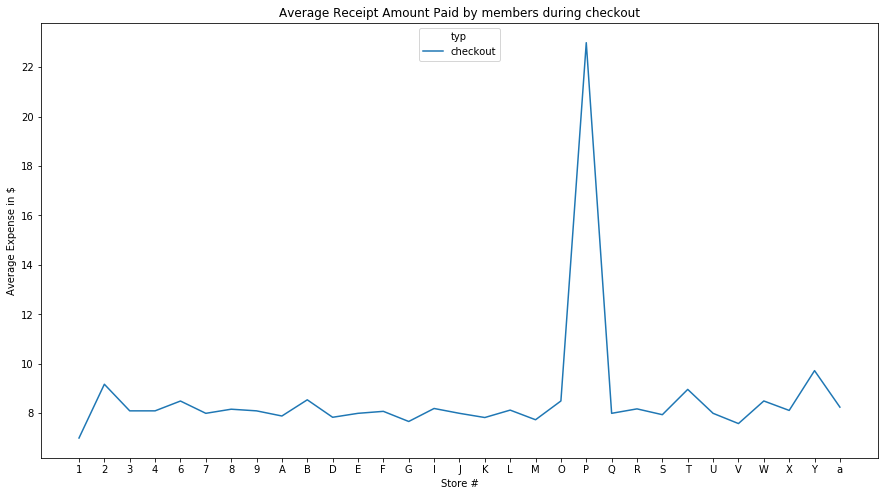

In [106]:
datafrr = pd.DataFrame({"store":store,"avg":avg,"typ":typ})
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="avg",hue="typ",data=datafrr)
ax.set_title('Average Receipt Amount Paid by members during checkout')
ax.set_ylabel('Average Expense in $')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

Generally, the ACE members tend to buy more than non_ace members. But still, they pay almost the same amount. Another reason to convert to member.

In [198]:
print(datafr['avg'].mean())
print(datafr['avg'].median())

8.97007999496095
7.83


In [210]:
avg_sales_per_receipt = ace_cust.groupby(['Loyalty ID','Receipt Number']).agg({'Net Sales': 'mean'}).reset_index()

In [211]:
print(avg_sales_per_receipt)

         Loyalty ID Receipt Number  Net Sales
0           193.531           1170     0.0000
1           193.531            632     0.0000
2           193.531         A62192     2.0000
3           193.531         B30794    10.0000
4           193.531         B30834     6.2500
...             ...            ...        ...
8715361  1997478447         C24205     6.9850
8715362  1997478447         D82195    11.4900
8715363  1997478447         E46083     7.7775
8715364  1997478447         H60312     5.8400
8715365  1997478447         H61589     9.9900

[8715366 rows x 3 columns]


In [212]:
avg_sales = avg_sales_per_receipt.groupby('Loyalty ID')

In [213]:
member = []
avg = []
#typ = []
for name,grp in avg_sales:
    temp= grp['Net Sales'].sum()
    member.append(name)
    avg.append(temp)

In [214]:
datafr = pd.DataFrame({"member":member,"Spent":avg}).reset_index(drop=True)
print(datafr)

            Spent       member
0       30.250000      193.531
1       23.970000      1.9e+09
2       14.490000      1.9e+09
3       16.165000  1.90001e+09
4       55.507333  1.90002e+09
...           ...          ...
521194  10.465000   1989147472
521195   7.990000   1990688905
521196  32.310000   1992604386
521197  12.670000   1995119816
521198  42.082500   1997478447

[521199 rows x 2 columns]


In [215]:
print(datafr['Spent'].median())
print(datafr['Spent'].mean())

57.15833333333334
200.65840654579443


In [216]:
print(datafr.shape[0])
print(datafr[datafr['Spent']>=250].shape[0])

print(datafr[datafr['Spent']>=250].shape[0]/datafr.shape[0])

521199
118061
0.2265180861820533


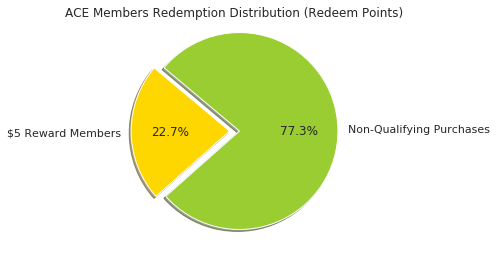

In [228]:
import matplotlib.pyplot as plt

# Data to plot
labels = '$5 Reward Members', 'Non-Qualifying Purchases'
sizes = [118061, 403138]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('ACE Members Redemption Distribution (Redeem Points)')
plt.show()

In [242]:
print("Hosd")
avg_sales_per_receipt = ace_cust.groupby(['Loyalty ID','Receipt Number']).agg({'Net Sales': 'sum'}).reset_index()
print("Ho")

Hosd
Ho


In [243]:
avg_sales = avg_sales_per_receipt.groupby('Loyalty ID')

In [244]:
member = []
summ = []
#typ = []
print(avg_sales)


In [245]:
for name,grp in avg_sales:
    temp= grp['Net Sales'].sum()
    member.append(name)
    summ.append(temp)
    #print(member,temp)
datafr = pd.DataFrame({"member":member,"Spent":summ}).reset_index(drop=True)
#print(datafr)

In [246]:
print(datafr)

         Spent       member
0        30.25      193.531
1        34.95      1.9e+09
2        28.98      1.9e+09
3        17.34  1.90001e+09
4       142.65  1.90002e+09
...        ...          ...
521194   20.93   1989147472
521195    7.99   1990688905
521196   71.94   1992604386
521197   50.68   1995119816
521198  126.68   1997478447

[521199 rows x 2 columns]


In [247]:
print(datafr['Spent'].median())
print(datafr['Spent'].mean())

112.43999999999998
421.87678677434167


In [248]:
print(datafr.shape[0])
print(datafr[datafr['Spent']>=250].shape[0])

print(datafr[datafr['Spent']>=250].shape[0]/datafr.shape[0])

521199
183460
0.35199607059875404


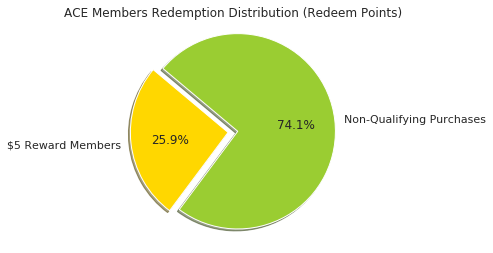

In [249]:
import matplotlib.pyplot as plt

# Data to plot
labels = '$5 Reward Members', 'Non-Qualifying Purchases'
sizes = [118061, 337739]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('ACE Members Redemption Distribution (Redeem Points)')
plt.show()

In [250]:
import gc
del datafr,avg_sales,avg_sales_per_receipt
gc.collect()

1625

In [251]:
print(train_data['Department Name'].unique())

['PAINT & PAINT SUPPLIES' 'HAND TOOLS & TOOL ACCESSORIES'
 'LAWN, GARDEN & FARM SUPPLIES' 'PLUMBING SUPPLIES & FIXTURES' 'HARDWARE'
 'ELECTRICAL SUPPLIES' 'STATIONARY & STORE SUPPLIES' 'FASTENERS'
 'FLASHLIGHTS, LIGHTING & SUPPLIES' 'CLEANING SUPPLIES' 'SPORTING GOODS'
 'IN STORE COUPONS' 'BUILDING MATERIALS & PRODUCTS'
 'NOTIONS & MISCELLANEOUS' 'Millwork' 'LIVE NURSERY GOODS'
 'HOUSEWARES & GIFTS' 'UNKNOWN DEPT 82' 'UNKNOWN DEPT 73'
 'UNKNOWN DEPT 97' 'WATER TREATMENT CHEMICALS' 'POWER TOOLS & ACCESSORIES'
 'HEATING & COOLING SUPPLIES' 'AUTOMOTIVE' 'UNKNOWN DEPT 74'
 'ACE REWARDS INSTANT SAVINGS' 'REPAIRS' 'UNKNOWN DEPT 51'
 'UNKNOWN DEPT 72' 'OUTDOOR EQUIPMENT & POWER TOOLS' 'COSTELLOS GIFT CARD'
 'UNKNOWN DEPT 89' 'SODA/ETC' 'OUTDOOR LIVING & FURNITURE' 'GIFT CARD'
 'APPLIANCES & HOME ENTERTAINMENT' 'UNKNOWN DEPT 87' 'DELIVERY & UPS'
 'LIPA INSTANT REBATE' 'UNKNOWN DEPT 31' 'PELLETS/WOOD FUEL'
 'UNKNOWN DEPT 85' 'PROPANE FILLS' 'UNKNOWN DEPT 96'
 'HHC COUPONS AND CERTIFICATES' 'UNK

In [95]:
#ace reward points analysis - How much could a non ace member saved?
non_items_dept_new = ['IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL','NO CHARGE SKU DEPT','BOTTLE DEPOSIT','DONTATIONS','REPAIRS','DELIVERY & UPS']
print(train_data.shape)
train_data_df = train_data[~train_data['Department Name'].isin(non_items_dept_new)][['Customer Number','Item Number','Receipt Number','Store #','Net Sales Units', 'Net Sales','Gross Margin', 'Gross Margin %','Department Name','Class Name','Fineline Name','Loyalty ID','Item Type']]
print(train_data_df.shape)

(32955491, 39)
(31089021, 13)


In [283]:
inst_save = train_data_df[train_data_df['Department Name']=='ACE REWARDS INSTANT SAVINGS']
print(inst_save)

         Customer Number Item Number Receipt Number Store #  Net Sales Units  \
279               *A75SF    IS103828         F13236       Y             -1.0   
348               *A93MT    IS103859         F13237       Y             -1.0   
349               *A93MT    IS103829         F13237       Y             -1.0   
395                 1304    IS103828         F66684       K             -1.0   
549               100968    IS103871         A12719       6             -1.0   
...                  ...         ...            ...     ...              ...   
32955008          *A77VL    IS157338         B83060       Y             -1.0   
32955152          199685    IS157342         D08492       M             -1.0   
32955220          112734    IS157346         J60349       6             -1.0   
32955221          112734    IS157347         J60349       6             -1.0   
32955436          145280    IS157347         G53962       4             -1.0   

          Net Sales  Gross Margin  Gros

In [290]:
insta = inst_save.groupby(['Store #','Receipt Number','Loyalty ID']).size().reset_index().rename(columns={0:'count'})

In [308]:
ace_members_receiving_instant_savings = insta[insta['Loyalty ID']!="NaN"].shape[0]
others_receiving_instant_savings = insta[insta['Loyalty ID']=="NaN"].shape[0]

In [309]:
print(ace_members_receiving_instant_savings,others_receiving_instant_savings)

593376 45123


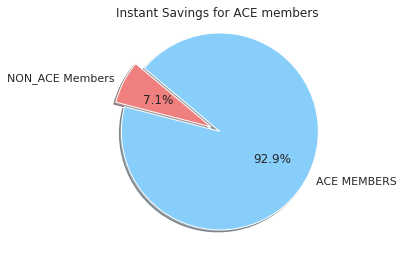

In [310]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'NON_ACE Members', 'ACE MEMBERS'
sizes = [others_receiving_instant_savings,ace_members_receiving_instant_savings]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Instant Savings for ACE members')
plt.show()

Actually 7.1% of non ace members are incorrectly provided with instant savings are there is data error.

In [321]:
#Lets calculate the average instant savings an ACE member makes
avg_savings_redeemed = insta.groupby('Store #')

In [324]:
store = []
avg = []
#typ = []
for name,grp in avg_savings_redeemed:
    temp= grp['count'].mean()
    store.append(name)
    avg.append(temp)

In [325]:
datafr = pd.DataFrame({"store":store,"avg":avg}).reset_index(drop=True)
print(datafr)

         avg store
0   1.504903     1
1   1.608080     2
2   1.599480     3
3   1.643511     4
4   1.638728     6
5   1.646229     7
6   1.602932     8
7   1.662016     9
8   1.607887     A
9   1.676737     B
10  1.670499     D
11  1.576196     E
12  1.632861     F
13  1.628382     G
14  1.654825     I
15  1.613950     J
16  1.608431     K
17  1.652419     L
18  1.646931     M
19  1.640308     O
20  1.430017     P
21  1.592510     Q
22  1.649562     R
23  1.623215     S
24  1.612356     T
25  1.668448     U
26  1.708170     V
27  1.872415     W
28  1.865434     X
29  1.695781     Y
30  1.546086     a


No handles with labels found to put in legend.


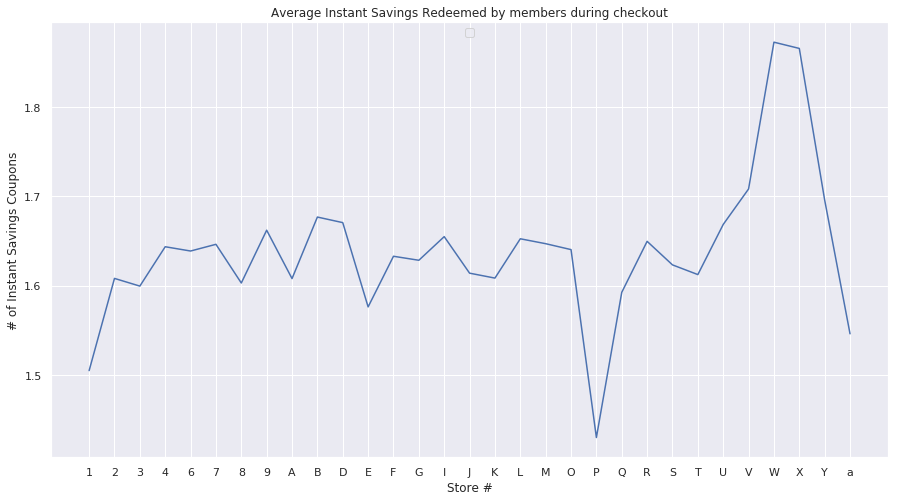

In [327]:
datafr = pd.DataFrame({"store":store,"avg":avg})
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="avg",data=datafr)
ax.set_title('Average Instant Savings Redeemed by members during checkout')
ax.set_ylabel('# of Instant Savings Coupons')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

Store P seems to have less redemption in instant savings, but has good sales going on. WX have high redemption and the sales is good but less compared to P. 

In [96]:
inst_save = train_data_df[train_data_df['Department Name']=='ACE REWARDS INSTANT SAVINGS']

In [97]:
#what is the avg instant savings amount members get?
insta = inst_save[inst_save['Item Type']=='Return'].groupby(['Store #','Receipt Number','Loyalty ID']).agg({'Net Sales': 'mean'}).reset_index()

In [107]:
avg_savings_redeemed = insta.groupby('Store #')
storef = []
avgf = []
typf = []
for name,grp in avg_savings_redeemed:
    temp= grp['Net Sales'].mean()
    storef.append(name)
    avgf.append(-temp)
    typf.append("reward")

In [109]:
datafr = pd.DataFrame({"store":storef,"avg":avgf,"typ":typf}).reset_index(drop=True)
print(datafr)

         avg store     typ
0   4.057255     1  reward
1   4.634083     2  reward
2   4.760705     3  reward
3   4.283557     4  reward
4   3.417280     6  reward
5   4.302997     7  reward
6   3.637207     8  reward
7   4.610270     9  reward
8   3.137796     A  reward
9   3.193793     B  reward
10  6.576648     D  reward
11  3.576238     E  reward
12  3.813142     F  reward
13  4.112964     G  reward
14  3.812847     I  reward
15  4.400335     J  reward
16  4.476084     K  reward
17  4.276429     L  reward
18  2.954624     M  reward
19  3.600893     O  reward
20  2.998064     P  reward
21  3.356286     Q  reward
22  3.627856     R  reward
23  3.733949     S  reward
24  2.687058     T  reward
25  4.048220     U  reward
26  3.260664     V  reward
27  3.874879     W  reward
28  3.689085     X  reward
29  3.725431     Y  reward
30  2.887146     a  reward


No handles with labels found to put in legend.


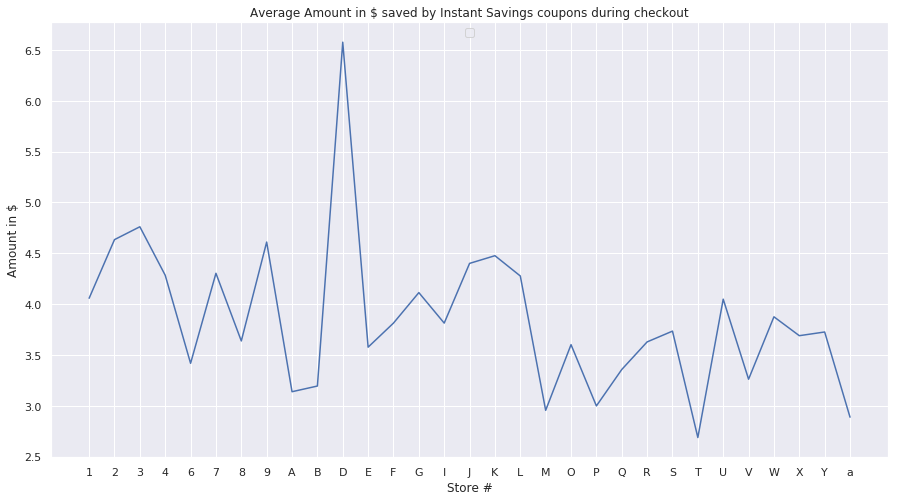

In [339]:
datafr = pd.DataFrame({"store":store,"avg":avg})
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="avg",data=datafr)
ax.set_title('Average Amount in $ saved by Instant Savings coupons during checkout')
ax.set_ylabel('Amount in $')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

Interesting - Store D - THough it has the highest instant savings opportunity, NON_ACE members tend to buy more here as per the avg items per buckets stats. If ACE can focus to convert these members to convert to ACE members, it can get a long term benefit of increased margin and loyalty.

In [110]:
frames = [datafrr,datafr]
md = pd.concat(frames)
print(md)

          avg store       typ
0    6.990000     1  checkout
1    9.166667     2  checkout
2    8.090000     3  checkout
3    8.090000     4  checkout
4    8.487500     6  checkout
5    7.990000     7  checkout
6    8.156667     8  checkout
7    8.090000     9  checkout
8    7.881667     A  checkout
9    8.536667     B  checkout
10   7.830000     D  checkout
11   7.990000     E  checkout
12   8.070000     F  checkout
13   7.660000     G  checkout
14   8.186000     I  checkout
15   7.990000     J  checkout
16   7.820000     K  checkout
17   8.120000     L  checkout
18   7.730000     M  checkout
19   8.490000     O  checkout
20  22.990000     P  checkout
21   7.990000     Q  checkout
22   8.170000     R  checkout
23   7.935000     S  checkout
24   8.958333     T  checkout
25   7.990000     U  checkout
26   7.575714     V  checkout
27   8.490000     W  checkout
28   8.107500     X  checkout
29   9.717778     Y  checkout
30   8.240000     a  checkout
0    4.057255     1    reward
1    4.634

In [ ]:
#datafrr,datafr

#datafrr = pd.DataFrame({"store":store,"avg":avg,"typ":typ})
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="avg",hue="typ",data=datafrr)
ax.set_title('Average Receipt Amount Paid by members during checkout')
ax.set_ylabel('Average Expense in $')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [123]:
print(datafr['store'])

0     1
1     2
2     3
3     4
4     6
5     7
6     8
7     9
8     A
9     B
10    D
11    E
12    F
13    G
14    I
15    J
16    K
17    L
18    M
19    O
20    P
21    Q
22    R
23    S
24    T
25    U
26    V
27    W
28    X
29    Y
30    a
Name: store, dtype: object


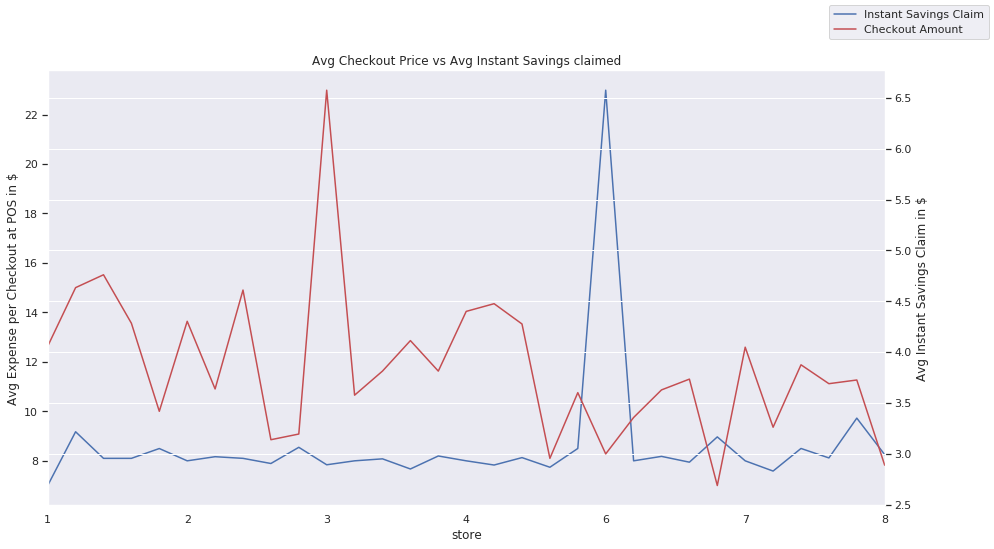

In [125]:
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt

ax = datafrr.plot(x="store", y="avg", legend=False,figsize=(15,8))
plt.ylabel('Avg Expense per Checkout at POS in $')
ax2 = ax.twinx()
datafr.plot(x="store", y="avg",  ax=ax2, legend=False,color = 'r')
ax2.set_ylabel('Avg Instant Savings Claim in $')
#ax.figure.legend()
L=ax.figure.legend()
L.get_texts()[0].set_text('Instant Savings Claim')
L.get_texts()[1].set_text('Checkout Amount')
ax.set_title('Avg Checkout Price vs Avg Instant Savings claimed')
ax.set_xticklabels(datafrr['store'])

#ax2.set_xticklabels(datafrr['store'])
ax.grid(None)
plt.show()

In [340]:
train_data[train_data['Department Name']=='NON-ACE INSTANT SAVINGS']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
25847,4/2/2015,14:05:33,201289,H75839,F,14822 NORTHPORT,OTHER,NIS100001,JON GREEN $5 INSTANT EARLYSPRING,-1.0,-5.00,0.00,-5.00,100.00,I9,NON-ACE INSTANT SAVINGS,IS9,NON-ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,JONGREEN,S,221.0,5.00,5.00,0.0,N,Alternate Tender,0.0,11768,3205,1.91544e+09,SHAUN GAULER,Return,3.0,Return,Promotion,NaN
29128,4/2/2015,15:49:56,189111,C43167,9,11730 BETHPAGE,OTHER,NIS100001,JON GREEN $5 INSTANT EARLYSPRING,-1.0,-5.00,0.00,-5.00,100.00,I9,NON-ACE INSTANT SAVINGS,IS9,NON-ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,JONGREEN,S,221.0,5.00,5.00,0.0,N,Bankcard Tender,0.0,11756,5505,1.91012e+09,JADE MABANTA,Return,8.0,Return,Promotion,NaN
29580,4/2/2015,16:05:59,100877,A13820,6,11116 BELLMORE,OTHER,SPRINGSEED,JON GREEN SPRING SEED KIT,1.0,34.99,23.01,11.98,34.24,I9,NON-ACE INSTANT SAVINGS,746,BAG PRODUCTS,74605,SOIL CONDITIONERS LRG BAG,5.0,2150401,S,221.0,34.99,34.99,0.0,Y,Cash Tender,0.0,11520,5719,1.90889e+09,NICOLE BROWN,Sale,3.0,Sale,Promotion,NaN
29581,4/2/2015,16:05:59,100877,A13820,6,11116 BELLMORE,OTHER,NIS100001,JON GREEN $5 INSTANT EARLYSPRING,-1.0,-5.00,0.00,-5.00,100.00,I9,NON-ACE INSTANT SAVINGS,IS9,NON-ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,JONGREEN,S,221.0,5.00,5.00,0.0,N,Cash Tender,0.0,11520,5719,1.90889e+09,NICOLE BROWN,Return,5.0,Return,Promotion,NaN
29582,4/2/2015,16:05:59,100877,A13820,6,11116 BELLMORE,OTHER,NIS100001,JON GREEN $5 INSTANT EARLYSPRING,-1.0,-5.00,0.00,-5.00,100.00,I9,NON-ACE INSTANT SAVINGS,IS9,NON-ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,JONGREEN,S,221.0,5.00,5.00,0.0,N,Cash Tender,0.0,11520,5719,1.90889e+09,NICOLE BROWN,Return,6.0,Return,Promotion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32584475,9/14/2018,11:52:24,176862,I56791,9,11730 BETHPAGE,OTHER,NIS7482227,$3 INSTANT SAVINGS SKU7482227,1.0,3.00,0.01,2.99,99.67,I9,NON-ACE INSTANT SAVINGS,IS9,NON-ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,*,0.0,3.00,3.00,0.0,N,Bankcard Tender,0.0,11758,2925,1.90742e+09,FRANCES BERMEL,Sale,3.0,Sale,Retail,NaN
32621005,9/15/2018,15:56:07,*5,E20827,S,16147 CALDWELL,OTHER,CREDBGE116253,GREEN EGG CREDIT $150 BGE116253,-1.0,-150.00,0.00,-150.00,100.00,I9,NON-ACE INSTANT SAVINGS,NaN,BLANK,NaN,BLANK,5.0,ISBGE150,S,5755.0,150.00,150.00,0.0,N,Bankcard Tender,0.0,NaN,NaN,NaN,SHEPHERD WESCOTT,Return,5.0,Return,Promotion,NaN
32743066,9/21/2018,15:42:40,*5,E22694,S,16147 CALDWELL,OTHER,CREDBGE116253,GREEN EGG CREDIT $150 BGE116253,1.0,150.00,0.00,150.00,100.00,I9,NON-ACE INSTANT SAVINGS,NaN,BLANK,NaN,BLANK,5.0,NaN,*,0.0,150.00,150.00,0.0,N,Bankcard Tender,0.0,NaN,NaN,NaN,SHEPHERD WESCOTT,Sale,6.0,Sale,Retail,NaN
32750785,9/21/2018,20:27:45,228061,A91059,V,16476 MELVILLE,OTHER,NISAR534,$2 Instant Savings SKU AR534,1.0,2.00,2.00,0.00,0.00,I9,NON-ACE INSTANT SAVINGS,IS9,NON-ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,*,0.0,2.00,2.00,0.0,N,Bankcard Tender,0.0,11746,3517,1.91015e+09,ROBERT BIALOSKURSKI,Sale,6.0,Sale,Retail,NaN


In [318]:
insta[insta['Loyalty ID']=="NaN"]['Store #'].unique()

array(['1', '2', '3', '4', '6', '7', '8', '9', 'A', 'B', 'D', 'E', 'F',
       'G', 'I', 'J', 'K', 'L', 'M', 'O', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'X', 'Y', 'a'], dtype=object)

In [319]:
train_data[train_data['Receipt Number']=='A90858']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
3003296,12/10/2015,16:14:58,212248,A90858,7,12168 WEST ISLIP,8.43518E+11,9827007,INC MINI MULT 100CT GC,1.0,3.99,2.96,1.03,25.81,94,NOTIONS & MISCELLANEOUS,950,CHRISTMAS LIGHTS/ACCESS,95001,PLATINUM LED MINIS,1.0,DATEXTND,S,0.0,3.99,5.99,2.00,Y,Bankcard Tender,2.00,11722,3404,1.91662e+09,CANDACE DEIN,Sale,1.0,Sale,Promotion,NaN
6718972,7/18/2015,12:35:13,*5,A90858,M,15444 GREAT NECK,74660304709,8265142,ICE SPRAY DETAILER 20OZ,1.0,11.99,6.60,5.39,44.95,84,AUTOMOTIVE,805,AUTO APPEARANCE CHEMICALS,80502,AUTO WAX/POLISH (LIQUID),1.0,NaN,NaN,0.0,11.99,11.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,JESSICA AMATULLI,Sale,1.0,Sale,Retail,NaN
6718973,7/18/2015,12:35:13,*5,A90858,M,15444 GREAT NECK,70612101600,88115,PROTECTANT ARMR ALL 16OZ,1.0,7.99,5.07,2.92,36.55,84,AUTOMOTIVE,805,AUTO APPEARANCE CHEMICALS,80503,PROTECTANT,1.0,NaN,NaN,0.0,7.99,7.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,JESSICA AMATULLI,Sale,2.0,Sale,Retail,NaN
9057231,6/26/2016,9:06:19,*33574,A90858,R,16038 NORTH BELLMORE,70798310841,13128,CONCRETE PATCH BNDX 32OZ,1.0,8.99,3.90,5.09,56.62,14,PAINT & PAINT SUPPLIES,148,CEMENTS/PLASTERS,14802,PATCH & REPAIR PRODUCTS,1.0,NaN,NaN,0.0,8.99,9.99,1.00,Y,Cash Tender,1.00,11566,2733,1.9783e+09,JAKE SANTIAGO,Sale,1.0,Sale,Category Price Plan,NaN
12262643,11/17/2015,19:07:24,*5,A90858,S,16147 CALDWELL,8.43518E+11,3279916,FLOOR LAMP TORCHRE BLACK,1.0,34.99,22.18,12.81,36.61,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",359,FUNCTIONAL INDOOR,35902,FLOOR LAMPS,1.0,NaN,NaN,0.0,34.99,34.99,0.00,Y,Alternate Tender,0.00,NaN,NaN,NaN,ARIANA VEGA,Sale,1.0,Sale,Retail,NaN
12262644,11/17/2015,19:07:24,*5,A90858,S,16147 CALDWELL,17801141115,3467115,BULB LED A21 SEMI 13W 3K,1.0,17.99,14.20,3.79,21.07,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",366,LED LIGHT BULBS,36604,A-LINE BULB - LED,1.0,NaN,NaN,0.0,17.99,17.99,0.00,Y,Alternate Tender,0.00,NaN,NaN,NaN,ARIANA VEGA,Sale,2.0,Sale,Retail,NaN
12262645,11/17/2015,19:07:24,*5,A90858,S,16147 CALDWELL,8.03994E+11,AR56220,EXT CORD 15' 16/2 INDOOR WHITE,1.0,4.99,2.59,2.40,48.10,34,ELECTRICAL SUPPLIES,307,CORD SETS,30701,INDOOR EXTENSION CORDS,1.0,NaN,NaN,0.0,4.99,4.99,0.00,Y,Alternate Tender,0.00,NaN,NaN,NaN,ARIANA VEGA,Sale,3.0,Sale,Retail,NaN
12262646,11/17/2015,19:07:24,*5,A90858,S,16147 CALDWELL,17801141115,3467115,BULB LED A21 SEMI 13W 3K,1.0,17.99,14.20,3.79,21.07,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",366,LED LIGHT BULBS,36604,A-LINE BULB - LED,1.0,NaN,NaN,0.0,17.99,17.99,0.00,Y,Alternate Tender,0.00,NaN,NaN,NaN,ARIANA VEGA,Sale,4.0,Sale,Retail,NaN
12262647,11/17/2015,19:07:24,*5,A90858,S,16147 CALDWELL,8.03994E+11,AR56220,EXT CORD 15' 16/2 INDOOR WHITE,1.0,4.99,2.59,2.40,48.10,34,ELECTRICAL SUPPLIES,307,CORD SETS,30701,INDOOR EXTENSION CORDS,1.0,NaN,NaN,0.0,4.99,4.99,0.00,Y,Alternate Tender,0.00,NaN,NaN,NaN,ARIANA VEGA,Sale,5.0,Sale,Retail,NaN
12652993,11/5/2016,17:43:40,*5,A90858,B,14252 ISLAND PARK,7.63062E+11,SH170000,IPHONE 6PIN CHARGE/SYNC CABLE,1.0,7.99,4.01,3.98,49.81,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",369,PHONE ACCESSORIES,36904,PHONE ACCESSORIES,1.0,NaN,NaN,0.0,7.99,7.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,JILLIAN DURYEA,Sale,1.0,Sale,Retail,NaN


In [300]:
print("Unique number of instant savings applied to any bill. Max of 99 instant savings has been applied to a bill.")
print(insta['count'].unique())

Unique number of instant savings applied to any bill. Max of 99 instant savings has been applied to a bill.
[ 1  2  3  5  4 10 13  6  7  8  9 11 24 12 14 19 39 16 18 20 15 22 30 21
 17 23 28 29 41 99 42 71 27 52 85 26 25 50 60 34 33 32 37 35]


In [298]:
insta[insta['count']==99]

,Store #,Receipt Number,Loyalty ID,count
111791,7,B84043,1.98174e+09,99
111792,7,B84045,1.98174e+09,99


In [306]:
#train_data[train_data['Receipt Number']=='B84043']
train_data[train_data['Department Name']=='ACE REWARDS INSTANT SAVINGS'][['Net Sales','Item Type']][train_data['Item Type']=='Sale']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Net Sales,Item Type
3464,5.0,Sale
5309,2.0,Sale
8510,4.0,Sale
11396,2.0,Sale
18578,3.0,Sale
...,...,...
32885717,10.0,Sale
32886246,10.0,Sale
32892842,2.0,Sale
32940018,2.0,Sale


In [264]:
ace_inst_savings = train_data[train_data['Department Name']=='ACE REWARDS INSTANT SAVINGS']
print(ace_inst_savings[ace_inst_savings['Loyalty ID']=="NaN"].shape[0]/ace_inst_savings.shape[0])

0.07149767728299132


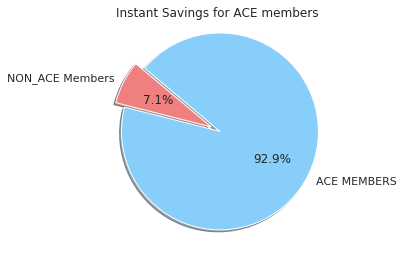

In [268]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'NON_ACE Members', 'ACE MEMBERS'
sizes = [ace_inst_savings[ace_inst_savings['Loyalty ID']=="NaN"].shape[0], ace_inst_savings.shape[0]-ace_inst_savings[ace_inst_savings['Loyalty ID']=="NaN"].shape[0]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Instant Savings for ACE members')
plt.show()

In [256]:
ace_inst_savings['Fineline Name'].unique()

array(['ACE COUPON/CREDIT ITEMS', 'BLANK'], dtype=object)

In [260]:
dff = ace_inst_savings[ace_inst_savings['Line Item Transaction Type']=='Sale']
dff[dff['Loyalty ID']=="NaN"]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
31307,4/2/2015,17:12:59,*5,E91209,B,14252 ISLAND PARK,OTHER,IS103664,3408176 $3 INST SAVINGS,1.0,3.0,0.0,3.0,100.0,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5.0,NaN,S,0.0,3.0,3.0,0.0,N,Cash Tender,0.0,NaN,NaN,NaN,BRIANNA MATTHEWS,Sale,3.0,Sale,Promotion,NaN
101409,4/6/2015,13:24:49,*5,F97505,J,15238 SMITHTOWN,OTHER,IS103894,7287154 $20 INST SAVINGS,1.0,20.0,0.0,20.0,100.0,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5.0,NaN,S,0.0,20.0,20.0,0.0,N,Bankcard Tender,0.0,NaN,NaN,NaN,BRIANNA QUINN,Sale,3.0,Sale,Promotion,NaN
113174,4/6/2015,19:39:16,*5,D14345,A,14070 NEW HYDE PARK,OTHER,IS103813,73240 $3 INST SAVINGS,1.0,3.0,0.0,3.0,100.0,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5.0,NaN,S,0.0,3.0,3.0,0.0,N,Cash Tender,0.0,NaN,NaN,NaN,AHMED ALAMI,Sale,4.0,Sale,Promotion,NaN
159401,4/9/2015,19:10:27,*5,E97045,B,14252 ISLAND PARK,OTHER,IS103869,7234248 $2 INST SAVINGS,1.0,2.0,0.0,2.0,100.0,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5.0,NaN,S,0.0,2.0,2.0,0.0,N,No Tender,0.0,NaN,NaN,NaN,GINA PLATANIA,Sale,3.0,Sale,Promotion,NaN
200209,4/11/2015,13:52:16,*5,C51805,4,6910 FARMINGDALE,OTHER,IS103892,7158314 $20 INST SAVINGS,1.0,20.0,0.0,20.0,100.0,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5.0,NaN,S,0.0,20.0,20.0,0.0,N,Bankcard Tender,0.0,NaN,NaN,NaN,RAYMOND HILLY,Sale,3.0,Sale,Promotion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32670400,9/17/2018,19:36:53,*5,A55953,a,16791 STATEN ISLAND,OTHER,IS157332,10222 $10 INST SAVINGS,1.0,10.0,0.0,10.0,100.0,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5.0,NaN,S,0.0,10.0,10.0,0.0,N,Cash Tender,0.0,NaN,NaN,NaN,DOUGLAS QUIMBY,Sale,3.0,Sale,Promotion,NaN
32801706,9/23/2018,14:31:08,*5,U53647,B,14252 ISLAND PARK,OTHER,IS157372,12228 $1 INST SAVINGS,1.0,1.0,0.0,1.0,100.0,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5.0,NaN,S,0.0,1.0,1.0,0.0,N,Bankcard Tender,0.0,NaN,NaN,NaN,CHRISTINA COSTANTE,Sale,6.0,Sale,Promotion,NaN
32828341,9/24/2018,18:48:59,*5,A91682,V,16476 MELVILLE,OTHER,IS157337,8315095 $5 INST SAVINGS,1.0,5.0,0.0,5.0,100.0,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5.0,NaN,S,0.0,5.0,5.0,0.0,N,Bankcard Tender,0.0,NaN,NaN,NaN,ROBERT BIALOSKURSKI,Sale,7.0,Sale,Promotion,NaN
32859935,9/26/2018,17:22:00,*5,H32923,A,14070 NEW HYDE PARK,OTHER,IS157338,7301609 $3 INST SAVINGS,1.0,3.0,0.0,3.0,100.0,I1,ACE REWARDS INSTANT SAVINGS,IS1,ACE COUPON/CREDIT ITEMS,IS106,ACE COUPON/CREDIT ITEMS,5.0,NaN,S,0.0,3.0,3.0,0.0,N,Bankcard Tender,0.0,NaN,NaN,NaN,WALTER ANDERSON,Sale,3.0,Sale,Promotion,NaN


In [263]:
train_data[train_data['Receipt Number']=='H32923']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
1081478,4/16/2016,15:03:44,*5,H32923,E,14664 NORTH MASSAPEQUA,50644622212,3163367,CONNECTOR RG6 QUAD 2PK,1.0,5.99,2.09,3.90,65.11,34,ELECTRICAL SUPPLIES,341,AUDIO/VIDEO ACCESSORIES,34104,VIDEO ACCESSORIES,1.0,NaN,NaN,0.0,5.99,5.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,ELIZABETH NICHOLES,Sale,1.0,Sale,Retail,NaN
1217069,4/21/2016,10:55:18,*5,H32923,J,15238 SMITHTOWN,7.61476E+11,1475375,BRUSH WATER FLOW- SOFT,1.0,14.99,6.73,8.26,55.10,10,CLEANING SUPPLIES,116,HOME/MAINTENANCE BRUSHES,11601,SCRUB BRUSHES,1.0,NaN,NaN,0.0,14.99,14.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,KATELYN RIEGER,Sale,1.0,Sale,Retail,NaN
1217070,4/21/2016,10:55:18,*5,H32923,J,15238 SMITHTOWN,8.43518E+11,11339,"HANDLE THRD 15/16X60""",1.0,11.99,3.65,8.34,69.56,10,CLEANING SUPPLIES,119,BROOMS/DUST PANS,11904,BROOM HANDLES/ACCS,1.0,NaN,NaN,0.0,11.99,11.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,KATELYN RIEGER,Sale,2.0,Sale,Retail,NaN
1531572,8/1/2016,16:35:13,*52759,H32923,I,15110 GARDEN CITY PARK,071121610676,7130057,CUTTER BUG FREE 32 OZ,1.0,12.99,7.94,5.05,38.88,70,"LAWN, GARDEN & FARM SUPPLIES",750,INSECTICIDES/REPELLENTS,075007,RTU PRODUCTS/APPLICATORS,1.0,NaN,NaN,0.0,12.99,12.99,0.00,Y,Bankcard Tender,0.00,11040,2224,1.90653e+09,ELEANOR ESKENAZI,Sale,1.0,Sale,Retail,NaN
1531573,8/1/2016,16:35:13,*52759,H32923,I,15110 GARDEN CITY PARK,070183500345,74684,ROUNDUP RTU 30OZ BONUS,1.0,5.99,3.66,2.33,38.90,70,"LAWN, GARDEN & FARM SUPPLIES",753,WEED CONTROL PRODUCTS,075304,VEGETATION KILL,1.0,NaN,NaN,0.0,5.99,5.99,0.00,Y,Bankcard Tender,0.00,11040,2224,1.90653e+09,ELEANOR ESKENAZI,Sale,2.0,Sale,Retail,NaN
1531574,8/1/2016,16:35:13,*52759,H32923,I,15110 GARDEN CITY PARK,088712400301,49219,"AUGER TOILET 3/8""X3'",1.0,14.99,5.11,9.88,65.91,40,PLUMBING SUPPLIES & FIXTURES,448,DRAIN CLEANER EQUIPMENT,044801,DRAIN AUGERS,1.0,NaN,NaN,0.0,14.99,14.99,0.00,Y,Bankcard Tender,0.00,11040,2224,1.90653e+09,ELEANOR ESKENAZI,Sale,3.0,Sale,Retail,NaN
1531575,8/1/2016,16:35:13,*52759,H32923,I,15110 GARDEN CITY PARK,082901071167,7098221,"ACE SHVL RNDPT D-HND 29""",1.0,29.99,11.07,18.92,63.09,70,"LAWN, GARDEN & FARM SUPPLIES",701,SHOVELS/SPADES/SCOOPS,070105,D-HANDLE ROUND PT. SHOVEL,1.0,NaN,NaN,0.0,29.99,29.99,0.00,Y,Bankcard Tender,0.00,11040,2224,1.90653e+09,ELEANOR ESKENAZI,Sale,4.0,Sale,Retail,NaN
1531576,8/1/2016,16:35:13,*52759,H32923,I,15110 GARDEN CITY PARK,OTHER,E00350,HUNTER SPRINKLER HEAD PGPADJ,1.0,14.99,7.95,7.04,46.96,70,"LAWN, GARDEN & FARM SUPPLIES",716,UNDER GROUND IRRIGATION,071601,POP-UP UNITS,5.0,NaN,NaN,0.0,14.99,14.99,0.00,Y,Bankcard Tender,0.00,11040,2224,1.90653e+09,ELEANOR ESKENAZI,Sale,5.0,Sale,Retail,NaN
6257898,1/26/2016,13:57:10,144448,H32923,G,14874 WEST BABYLON,82901124702,1213545,CAULK K&B CLR 5.5OZ ACE,2.0,8.98,2.52,6.46,71.94,14,PAINT & PAINT SUPPLIES,128,CAULK/SEALANTS/GLAZING,12805,TUB/TILE,1.0,NaN,NaN,0.0,4.49,4.49,0.00,Y,Bankcard Tender,0.00,11951,4011,1.90764e+09,AMBER KEICHER,Sale,1.0,Sale,Retail,NaN
6257899,1/26/2016,13:57:10,144448,H32923,G,14874 WEST BABYLON,82901145851,5301353,"DOOR STOP TIP RBR 5/8""WH",1.0,2.59,0.69,1.90,73.36,50,HARDWARE,516,DOOR HARDWARE,51609,STOPS,1.0,NaN,NaN,0.0,2.59,2.59,0.00,Y,Bankcard Tender,0.00,11951,4011,1.90764e+09,AMBER KEICHER,Sale,2.0,Sale,Retail,NaN


In [102]:
all = (train_data['Department Name'].unique()).tolist()
all

{'UNKNOWN DEPT 96', 'UNKNOWN DEPT 22', 'POWER TOOLS & ACCESSORIES', 'UNKNOWN DEPT 18', 'UNKNOWN DEPT 74', 'UNKNOWN DEPT 42', 'NO CHARGE SKU DEPT', 'BOTTLE DEPOSIT', 'UNKNOWN DEPT 89', 'UNKNOWN DEPT 81', 'SPORTING GOODS', 'APPLIANCES & HOME ENTERTAINMENT', 'UNKNOWN DEPT 75', 'LAWN, GARDEN & FARM SUPPLIES', 'SHARPENING', 'UNKNOWN DEPT 73', 'FLASHLIGHTS, LIGHTING & SUPPLIES', 'STATIONARY & STORE SUPPLIES', 'SODA/ETC', 'PLUMBING SUPPLIES & FIXTURES', 'HAND TOOLS & TOOL ACCESSORIES', 'WATER TREATMENT CHEMICALS', 'UNKNOWN DEPT 95', 'HEATING & COOLING SUPPLIES', 'DONTATIONS', 'UNKNOWN DEPT 85', 'UNKNOWN DEPT 82', 'UNKNOWN DEPT 83', 'UNKNOWN DEPT 31', 'OUTDOOR LIVING & FURNITURE', 'UNKNOWN DEPT 55', 'UNKNOWN DEPT 35', 'UNKNOWN DEPT 78', 'REPAIRS', 'Building Specialties', 'UNKNOWN DEPT 87', 'OUTDOOR EQUIPMENT & POWER TOOLS', 'ELECTRICAL SUPPLIES', 'BLANK', 'PAINT & PAINT SUPPLIES', 'LIVE NURSERY GOODS', 'FASTENERS', 'CLEANING SUPPLIES', 'BUILDING MATERIALS & PRODUCTS', 'Millwork', 'PROPANE FILL

In [101]:
non_items_dept_new = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']

In [104]:
for val in list(set(all)-set(non_items_dept_new)):
    print(val)

UNKNOWN DEPT 96
UNKNOWN DEPT 22
POWER TOOLS & ACCESSORIES
UNKNOWN DEPT 18
UNKNOWN DEPT 74
UNKNOWN DEPT 42
NO CHARGE SKU DEPT
BOTTLE DEPOSIT
UNKNOWN DEPT 89
UNKNOWN DEPT 81
SPORTING GOODS
APPLIANCES & HOME ENTERTAINMENT
UNKNOWN DEPT 75
LAWN, GARDEN & FARM SUPPLIES
SHARPENING
UNKNOWN DEPT 73
FLASHLIGHTS, LIGHTING & SUPPLIES
STATIONARY & STORE SUPPLIES
SODA/ETC
PLUMBING SUPPLIES & FIXTURES
HAND TOOLS & TOOL ACCESSORIES
WATER TREATMENT CHEMICALS
UNKNOWN DEPT 95
HEATING & COOLING SUPPLIES
DONTATIONS
UNKNOWN DEPT 85
UNKNOWN DEPT 82
UNKNOWN DEPT 83
UNKNOWN DEPT 31
OUTDOOR LIVING & FURNITURE
UNKNOWN DEPT 55
UNKNOWN DEPT 35
UNKNOWN DEPT 78
REPAIRS
Building Specialties
UNKNOWN DEPT 87
OUTDOOR EQUIPMENT & POWER TOOLS
ELECTRICAL SUPPLIES
BLANK
PAINT & PAINT SUPPLIES
LIVE NURSERY GOODS
FASTENERS
CLEANING SUPPLIES
BUILDING MATERIALS & PRODUCTS
Millwork
PROPANE FILLS
UNKNOWN DEPT 72
HOUSEWARES & GIFTS
NOTIONS & MISCELLANEOUS
PELLETS/WOOD FUEL
HARDWARE
AUTOMOTIVE
UNKNOWN DEPT 27
UNKNOWN DEPT 52
DELIVE

In [109]:
train_data[train_data['Department Name']=='DELIVERY & UPS'].head(10)

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
1375,4/1/2015,9:48:22,*A34BG,F68312,X,16661 PASADENA,OTHER,COUPON5,IN-STORE COUPON SAVE $5.00,-1.0,-5.0,-0.01,-4.99,99.8,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,5.0,5.0,0.0,Y,Bankcard Tender,0.0,21619,346,1.90134e+09,KRISTY BUCYNSKI,Return,2.0,Return,Retail,NaN
1551,4/1/2015,9:59:40,*A94MM,F13273,Y,16663 EDGEWATER,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-1.0,-10.0,0.00,-10.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Bankcard Tender,0.0,20764,697,1.90117e+09,UNKNOWN CLERK KMCPOS,Return,4.0,Return,Retail,NaN
3557,4/1/2015,11:21:57,*A44XB,F68375,X,16661 PASADENA,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-1.0,-10.0,0.00,-10.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Split Alternate Tender,0.0,21122,4146,1.92156e+09,KRISTY BUCYNSKI,Return,2.0,Return,Retail,NaN
4734,4/1/2015,12:05:32,*A350R,F68419,X,16661 PASADENA,OTHER,SHOP5,SHOP LOCAL $5 OFF SAVINGS,-1.0,-5.0,-0.01,-4.99,99.8,99,DELIVERY & UPS,NaN,BLANK,NaN,BLANK,5.0,NaN,NaN,0.0,5.0,5.0,0.0,Y,Alternate Tender,0.0,21122,4913,1.97546e+09,KRISTY BUCYNSKI,Return,3.0,Return,Retail,NaN
4956,4/1/2015,12:14:04,*A03SV,F68425,X,16661 PASADENA,OTHER,COUPON5,IN-STORE COUPON SAVE $5.00,-1.0,-5.0,-0.01,-4.99,99.8,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,5.0,5.0,0.0,Y,Cash Tender,0.0,21122,5245,1.97546e+09,KRISTY BUCYNSKI,Return,5.0,Return,Retail,NaN
5103,4/1/2015,12:18:59,*A5317,F68427,X,16661 PASADENA,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-2.0,-20.0,0.00,-20.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Bankcard Tender,0.0,21122,4830,1.97546e+09,KRISTY BUCYNSKI,Return,14.0,Return,Retail,NaN
5143,4/1/2015,12:20:09,*A49X1,F68428,X,16661 PASADENA,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-1.0,-10.0,0.00,-10.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Cash Tender,0.0,88002,1111,1.92942e+09,KRISTY BUCYNSKI,Return,4.0,Return,Retail,NaN
5532,4/1/2015,12:34:21,*A05DZ,F68437,X,16661 PASADENA,OTHER,COUPON10,IN-STORE COUPON SAVE $10.00,-1.0,-10.0,0.00,-10.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,10.0,10.0,0.0,Y,Bankcard Tender,0.0,21122,5358,1.97823e+09,KRISTY BUCYNSKI,Return,3.0,Return,Retail,NaN
5714,4/1/2015,12:41:24,*A353T,F68444,X,16661 PASADENA,OTHER,COUPON7,IN-STORE COUPON SAVE $7.00,-1.0,-7.0,0.00,-7.00,100.0,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,7.0,7.0,0.0,Y,Cash Tender,0.0,21122,3166,1.90591e+09,KRISTY BUCYNSKI,Return,6.0,Return,Retail,NaN
8336,4/1/2015,14:22:42,*A03VT,F68550,X,16661 PASADENA,OTHER,COUPON5,IN-STORE COUPON SAVE $5.00,-1.0,-5.0,-0.01,-4.99,99.8,99,DELIVERY & UPS,HH2,ACE COUPON/CREDIT ITEMS,NaN,BLANK,5.0,NaN,NaN,0.0,5.0,5.0,0.0,Y,Bankcard Tender,0.0,21122,4204,1.97399e+09,KRISTY BUCYNSKI,Return,4.0,Return,Retail,NaN


In [83]:
non_items_dept_new = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL','NO CHARGE SKU DEPT','BOTTLE DEPOSIT','DONTATIONS','REPAIRS','DELIVERY & UPS']

In [84]:
print(train_data.shape)
train_data_df = train_data[~train_data['Department Name'].isin(non_items_dept_new)]
print(train_data_df.shape)

(32955491, 39)
(30036805, 39)


In [78]:
import gc
del td_reduced
gc.collect()

NameError: name 'td_reduced' is not defined

In [80]:
ace_cust = train_data_df[train_data_df['Loyalty ID']!="NaN"]
non_ace_cust = ace_customers = train_data_df[train_data_df['Loyalty ID']=="NaN"]
df=pd.DataFrame({'columns':["ACE_MEMBERS","NON_ACE_MEMBERS"],'val':[ace_cust.shape[0],non_ace_cust.shape[0]]})

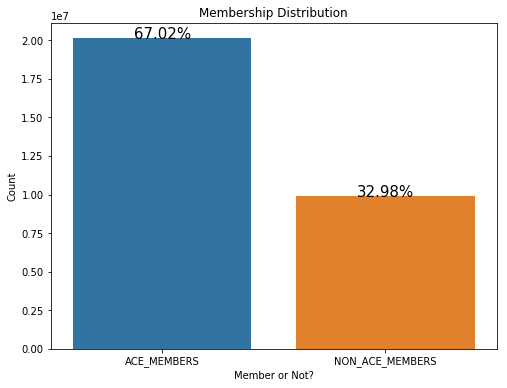

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
_ = ax = sns.barplot(x='columns', y='val', data = df)
_ = ax.set_title("Membership Distribution")
_ = ax.set(xlabel='Member or Not?', ylabel='Count')
for p in ax.patches:
    height = p.get_height()
    _ = ax.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/train_data_df.shape[0] * 100),
            ha="center", fontsize=15)

In [85]:
grp = train_data_df.groupby(by='Store #')
store_name = []
ace_members_count = []
non_ace_members_count = []
for name,val in grp:
    store_name.append(name)
    ace_members_count.append(val[val['Loyalty ID']!="NaN"].shape[0])
    non_ace_members_count.append(val[val['Loyalty ID']=="NaN"].shape[0])

In [86]:
df=pd.DataFrame({'store':store_name,'ace_members':ace_members_count,'non_ace_members':non_ace_members_count})

In [87]:
print(df)

    ace_members  non_ace_members store
0        183617           116406     1
1        182692            64651     2
2        793209           376203     3
3        622832           319443     4
4       1685399           543557     6
5        560228           261001     7
6       1145480           407419     8
7        977438           454289     9
8        558275           405096     A
9       2431039           988138     B
10       139064           168646     D
11      1245984           371001     E
12       757602           300430     F
13       590856           276617     G
14       955096           487799     I
15       736200           328491     J
16       438409           230418     K
17       440090           339471     L
18       298661           207909     M
19       864969           265117     O
20       143418            56507     P
21       275757           149244     Q
22       675993           323223     R
23       533578           415609     S
24       104655          

In [83]:
df=pd.DataFrame({'store':store_name,'ace_members':np.log2(ace_members_count),'non_ace_members':np.log2(non_ace_members_count)})

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


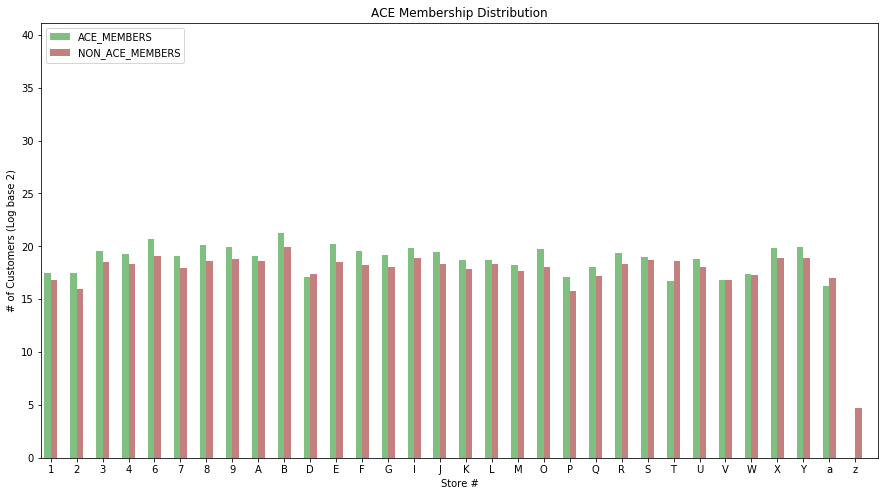

In [84]:
# Setting the positions and width for the bars
pos = list(range(len(df['store']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,8))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['ace_members'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#008000') 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['non_ace_members'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#8B0000') 

# Set the y axis label
ax.set_ylabel('# of Customers (Log base 2)')

ax.set_xlabel('Store #')

# Set the chart's title
ax.set_title('ACE Membership Distribution')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['store'])
plt.grid(None)
# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['ace_members'] + df['non_ace_members'])] )
#plt.yticks([])
# Adding the legend and showing the plot
plt.legend(['ACE_MEMBERS', 'NON_ACE_MEMBERS'], loc='upper left')
plt.grid()
plt.show()

In [85]:
import gc
del grp
gc.collect()

0

In [86]:
ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].head(2)

,Customer Number,Item Number,Receipt Number,Store #,Loyalty ID,Gross Margin,Gross Margin %
0,88806,B05481X,4297,P,1.98203e+09,37.68,31.41
1,88806,B05482X,4297,P,1.98203e+09,28.46,35.58


In [87]:
ace_df = ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Store #','Receipt Number']).agg({'Gross Margin': 'mean'}).reset_index()

In [88]:
nonace_df = non_ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Store #','Receipt Number']).agg({'Gross Margin': 'mean'}).reset_index()

In [89]:
result_sales_nonace = nonace_df.groupby('Store #')
result_sales_ace = ace_df.groupby('Store #')

In [90]:
store = []
avg = []
typ = []
for name,grp in result_sales_nonace:
    print(name,grp['Gross Margin'].mean())
    store.append(name)
    avg.append(grp['Gross Margin'].mean())
    typ.append("NON_ACE")

for name,grp in result_sales_ace:
    print(name,grp['Gross Margin'].mean())
    store.append(name)
    avg.append(grp['Gross Margin'].mean())
    typ.append("ACE")

1 4.669749525640509
2 5.230917153847827
3 5.451945090703596
4 5.2613627783899055
6 5.397590646465402
7 4.728529656173565
8 5.186736576240154
9 5.270466619716167
A 5.129324717506714
B 5.464833412246242
D 3.786535974465429
E 4.93746622920351
F 5.28122042126561
G 4.789827554956349
I 5.41295041474444
J 5.0889968461830835
K 4.736333648564206
L 5.3070695234764385
M 5.1318610973149665
O 5.149806977082222
P 9.655698715244869
Q 5.094590047650242
R 5.153048398736537
S 5.050209234273517
T 5.528877496938495
U 5.016251775111548
V 4.6306313557782
W 5.4121942256044555
X 5.0090067363175
Y 5.596861740030656
a 5.182598809201806
z -1.4583928571428575
1 4.931900797879079
2 6.633100414603742
3 5.550543679957283
4 5.637504931440466
6 5.124597236880589
7 4.867832374601586
8 5.200067092984548
9 5.068476516696059
A 4.718541422714234
B 5.099436067613957
D 4.615587917044243
E 4.990280618023917
F 5.150584272100191
G 4.798783723931971
I 5.2229057743737455
J 5.127041800757171
K 4.857695555639756
L 5.064483060700256

In [91]:
datafr = pd.DataFrame({"store":store,"avg":avg,"type":typ})

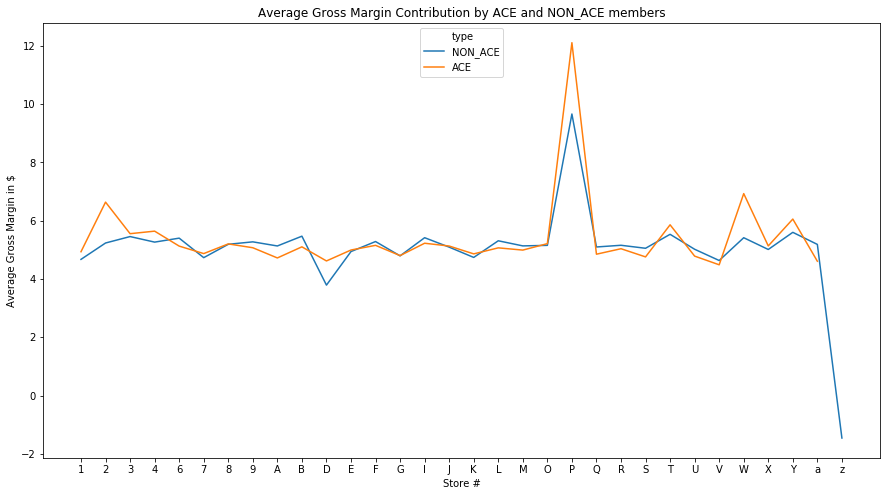

In [92]:
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="avg", hue="type",data=datafr)
ax.set_title('Average Gross Margin Contribution by ACE and NON_ACE members')
ax.set_ylabel('Average Gross Margin in $')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [93]:
grpby_nonace = non_ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
grpby_ace = ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
resultna = grpby_nonace.groupby('Store #')
resulta = grpby_ace.groupby('Store #')

In [94]:
store = []
avg = []
typ = []
for name,grp in resultna:
    print(name,grp['count'].mean())
    store.append(name)
    avg.append(grp['count'].mean())
    typ.append("NON_ACE")
for name,grp in resulta:
    print(name,grp['count'].mean())
    store.append(name)
    avg.append(grp['count'].mean())
    typ.append("ACE")

1 1.646594525779758
2 1.8635171360216758
3 1.8037772578201416
4 1.9383441948520042
6 2.177276186661326
7 1.8057604228645754
8 1.9733842882537285
9 1.9733677946223014
A 1.9637971320813257
B 2.5631768578491516
D 2.953520140105079
E 1.9092565241332462
F 1.9436878505761255
G 1.8929385277593391
I 2.045501815711566
J 1.9738791844681196
K 1.7780950249639238
L 1.9478929973146044
M 1.8731384296589937
O 2.1000364373752416
P 2.1813163481953293
Q 2.021728528853969
R 2.11526455286149
S 2.0961980753323783
T 1.8131313131313131
U 2.174629418472064
V 2.04583423345575
W 1.80390470656595
X 2.0821313158514827
Y 2.3513251606469154
a 2.3955186995441813
z 1.9285714285714286
1 1.9890697951534453
2 2.6927056465282178
3 2.018081622995489
4 2.3184202199929276
6 2.5911197136760284
7 2.037274218241457
8 2.2503501806401673
9 2.2406636911516253
A 2.1880180755709366
B 2.759715609681894
D 2.482709371038866
E 2.1828425670277922
F 2.145579568336359
G 2.150232725711187
I 2.2825923819265532
J 2.2405093339338866
K 1.987987

In [95]:
datafr = pd.DataFrame({"store":store,"avg":avg,"type":typ})

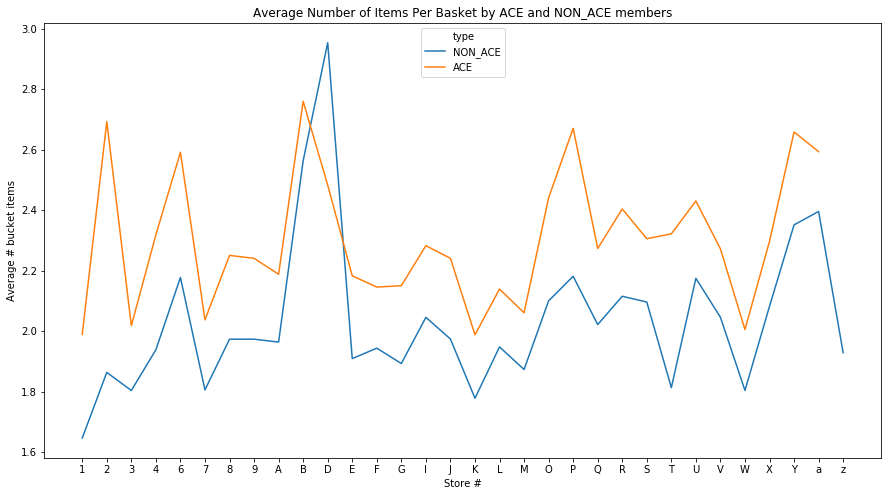

In [96]:
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="avg", hue="type",data=datafr)
ax.set_title('Average Number of Items Per Basket by ACE and NON_ACE members')
ax.set_ylabel('Average # bucket items')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [97]:
#Store wise return ratio
returndf = train_data_df[train_data_df['Line Item Transaction Type']=='Return']
saledf = train_data_df[train_data_df['Line Item Transaction Type']=='Sale']

In [98]:
retstore = returndf.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
salestore = saledf.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})

In [99]:
result_ret = retstore.groupby('Store #')
result_sale = salestore.groupby('Store #')

In [100]:
storeretlist = []
avgretlist = []
storesalelist = []
avgsalelist = []
for name,grp in result_ret:
    print(name,grp['count'].mean())
    storeretlist.append(name)
    avgretlist.append(grp['count'].mean())

for name,grp in result_sale:
    print(name,grp['count'].mean())
    storesalelist.append(name)
    avgsalelist.append(grp['count'].mean())

1 1.3835141651597347
2 1.4645892351274787
3 1.4007514692186647
4 1.4016494845360825
6 1.4316323653791936
7 1.3655308950713765
8 1.3917488573490497
9 1.3544045156182156
A 1.3816444899351756
B 1.4934101957985817
D 1.411231884057971
E 1.3825061274509804
F 1.403255848606765
G 1.3742623918174666
I 1.3883672404799166
J 1.4032332563510392
K 1.3299918551469205
L 1.3642938713361248
M 1.4329225761450826
O 1.3857830593745935
P 1.5450403084472486
Q 1.372445187662579
R 1.4037843767139386
S 1.414982623246235
T 1.261274993275352
U 1.4314054366685947
V 1.3901170351105332
W 1.327204630575417
X 1.2889954351009159
Y 1.3445693992305416
a 1.3919856727109916
z 2.0
1 1.8133884028178195
2 2.394780660891629
3 1.9249221210534897
4 2.162839278270708
6 2.5219514382017434
7 1.9396604768033339
8 2.157663520517607
9 2.1450786844381056
A 2.079735807588168
B 2.9314104166498676
D 2.7286135961128015
E 2.100618505757425
F 2.069466445157053
G 2.0463090010976948
I 2.184087437350873
J 2.135498173142695
K 1.8941626856112022


In [101]:
datafr = pd.DataFrame({"store":storeretlist,"ret":avgretlist,"sale":avgsalelist})

In [102]:
datafr['RetToSales'] = datafr['ret']/datafr['sale']

In [103]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

x = datafr['RetToSales'].values.astype(float).reshape(-1,1)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

datafr['Norm'] = df_normalized

No handles with labels found to put in legend.


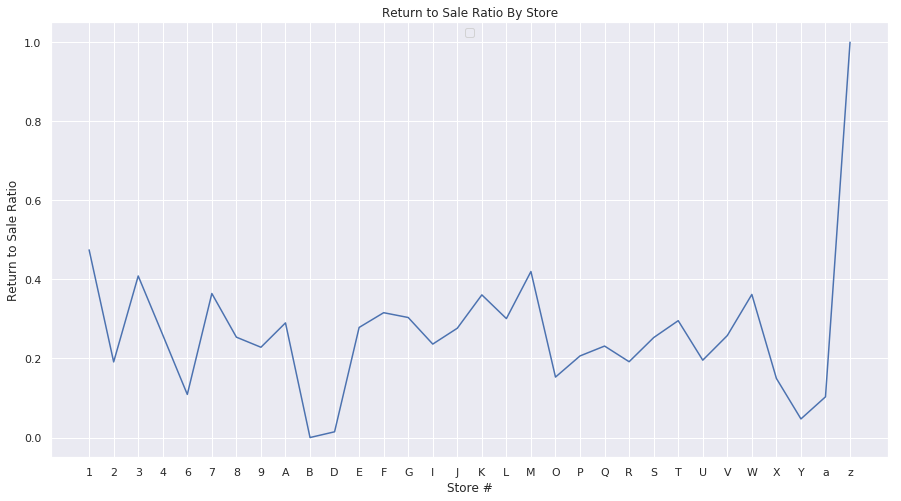

In [104]:
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt

ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="store", y="Norm", data=datafr)
ax.set_title('Return to Sale Ratio By Store')
ax.set_ylabel('Return to Sale Ratio')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [105]:
#return by ace membership
non_ace_customers_ret_df = returndf[returndf['Loyalty ID']=="NaN"]
non_ace_customers_sale_df = saledf[saledf['Loyalty ID']=="NaN"]

ace_customers_ret_df = returndf[returndf['Loyalty ID']!="NaN"]
ace_customers_sale_df = saledf[saledf['Loyalty ID']!="NaN"]

na_retstore = non_ace_customers_ret_df.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
na_salestore = non_ace_customers_sale_df.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})

ace_retstore = ace_customers_ret_df.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})
ace_salestore = ace_customers_sale_df.groupby(['Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})

na_result_ret = na_retstore.groupby('Store #')
na_result_sale = na_salestore.groupby('Store #')

ace_result_ret = ace_retstore.groupby('Store #')
ace_result_sale = ace_salestore.groupby('Store #')

In [106]:
storeretlist = []
avgretlist = []
storesalelist = []
avgsalelist = []
for name,grp in na_result_ret:
    print(name,grp['count'].mean())
    storeretlist.append(name)
    avgretlist.append(grp['count'].mean())
for name,grp in na_result_sale:
    print(name,grp['count'].mean())
    avgsalelist.append(grp['count'].mean())

1 1.2885085574572128
2 1.4089661482159195
3 1.3954745018574806
4 1.3545867651235444
6 1.4140170363498354
7 1.3918991899189919
8 1.355332076262309
9 1.345509637235923
A 1.381145071028842
B 1.4684932685276786
D 1.4261206419479802
E 1.370492887859742
F 1.3942380591357089
G 1.3178267045454546
I 1.3754735628397299
J 1.3960883845924157
K 1.3376132930513596
L 1.368135687473933
M 1.4072557050906964
O 1.3428863868986693
P 1.715625
Q 1.3518621456364648
R 1.3975112812799124
S 1.410682921789441
T 1.2312744872090344
U 1.3977755969905137
V 1.3619817997977754
W 1.3316815328708291
X 1.3814456721915285
Y 1.5573938098336277
a 1.3962476547842402
z 2.0
1 1.6261649883140492
2 1.8494080319633361
3 1.7868551034693536
4 1.9272770416255574
6 2.1675298393425018
7 1.7869506001191726
8 1.9625062406390414
9 1.9683028199840251
A 1.9559054640639133
B 2.5494531430195946
D 2.9688031967315927
E 1.8968582969304835
F 1.9327994892122695
G 1.8806042440281063
I 2.034140253256715
J 1.961457331063578
K 1.7601626660747693
L 1.

In [107]:
datafr = pd.DataFrame({"store":storeretlist,"na_ret":avgretlist,"na_sale":avgsalelist})

In [108]:
storeretlist = []
avgretlist = []
storesalelist = []
avgsalelist = []
for name,grp in ace_result_ret:
    print(name,grp['count'].mean())
    storeretlist.append(name)
    avgretlist.append(grp['count'].mean())
for name,grp in ace_result_sale:
    print(name,grp['count'].mean())
    avgsalelist.append(grp['count'].mean())
  

1 1.4392635102821616
2 1.4895363151415675
3 1.4028576563623292
4 1.4240681864303593
6 1.4343357949995552
7 1.3547914069946476
8 1.402604296777417
9 1.3582795541214432
A 1.3819723085617406
B 1.4927601268473643
D 1.4009198926791875
E 1.385480656346411
F 1.4061928984147365
G 1.3958786724700762
I 1.3943430796243987
J 1.405715174774401
K 1.3262072198781059
L 1.361825652018578
M 1.4498456790123457
O 1.3973145498569228
P 1.4957071848169905
Q 1.38277979346916
R 1.4063031900291
S 1.4180363956560023
T 1.3664646464646464
U 1.4498031496062993
V 1.416326530612245
W 1.3224446786090622
X 1.258271812722335
Y 1.245147844209978
a 1.3856825749167592
1 1.957192881363445
2 2.672455313738688
3 1.99867289143778
4 2.3081064220607432
6 2.578749442386315
7 2.020303199439602
8 2.237497038664826
9 2.238826294225762
A 2.1803928495144835
B 2.7555741538753753
D 2.4817488673615973
E 2.1706435272421487
F 2.1296522475184596
G 2.1351644339384723
I 2.269959844540297
J 2.2244060747369083
K 1.973073655316646
L 2.1236037447

In [109]:
datafr['ace_ret'] = pd.DataFrame(avgretlist)
datafr['ace_sale'] = pd.DataFrame(avgsalelist)
datafr['RetToSales_NONACE'] = datafr['na_ret']/datafr['na_sale']
datafr['RetToSales_ACE'] = datafr['ace_ret']/datafr['ace_sale']
datafr = datafr.fillna(0)

x = datafr['RetToSales_NONACE'].values.astype(float).reshape(-1,1)
y = datafr['RetToSales_ACE'].values.astype(float).reshape(-1,1)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
y_scaled = min_max_scaler.fit_transform(y)
# Run the normalizer on the dataframe
datafr['Non_ACE'] = pd.DataFrame(x_scaled)
datafr['Ace'] = pd.DataFrame(y_scaled)

<Figure size 1080x576 with 0 Axes>

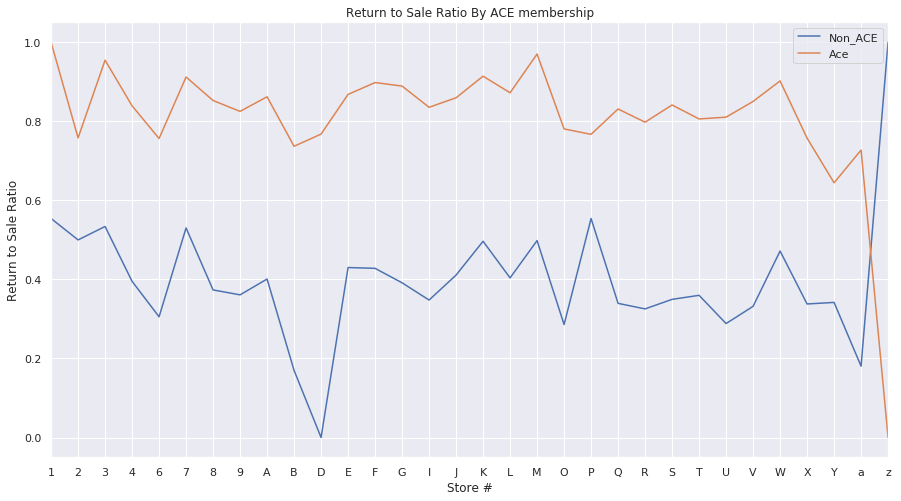

In [110]:
plt.figure(figsize=(15,8))
ax = datafr.plot(x="store", y=["Non_ACE", "Ace"],figsize=(15,8), grid=True)
x = datafr['store']
plt.xticks(range(0,len(x)),x,rotation=0)
ax.set_title('Return to Sale Ratio By ACE membership')
ax.set_ylabel('Return to Sale Ratio')
ax.set_xlabel('Store #')
plt.show()

In [111]:
act = ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Loyalty ID','Store #','Receipt Number']).size().reset_index().rename(columns={0:'count'})

In [112]:
repo = act.groupby('Loyalty ID').size().reset_index().rename(columns={0:'count'})

In [113]:
actt = ace_cust[['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']].groupby(['Loyalty ID','Store #','Receipt Number']).agg({'Gross Margin': 'sum'}).reset_index()

In [114]:
repos = actt.groupby('Loyalty ID').agg({'Gross Margin': 'sum'}).reset_index()

In [115]:
repos['count'] = repo['count']

In [116]:
reppdf = repos[(repos['Gross Margin']>0) & (repos['count']>1)]
avg_repeating_customer = reppdf['count'].median()
ace_rep_cust_margin = reppdf['Gross Margin'].sum()

In [117]:
print(avg_repeating_customer,ace_rep_cust_margin)

10.0 96367930.17000003


In [118]:
non_ace_cust_margin = non_ace_cust['Gross Margin'].sum()
total = non_ace_cust_margin + ace_rep_cust_margin
print(ace_rep_cust_margin/total*100)

66.4767547925613


In [119]:
print("Average number of visits by ACE member in 2 year period",reppdf['count'].median())
print("Average margin offered by ACE member in 2 year period",reppdf['Gross Margin'].mean())

Average number of visits by ACE member in 2 year period 10.0
Average margin offered by ACE member in 2 year period 246.12474854485234


In [78]:
train_data.shape

(32955491, 39)

## Average expense and savings in a bill for ace and non ace member

In [79]:
rmv = ['ACE REWARDS INSTANT SAVINGS', 'IN STORE COUPONS',
       'NON-ACE INSTANT SAVINGS',
       'GIFT CARD OFFSET (SPECL PROMO)']

In [80]:
train_data.columns

Index(['Date', 'Transaction Time', 'Customer Number', 'Receipt Number',
       'Store #', 'Store Name', 'Scanned UPC', 'Item Number',
       'Item Description', 'Net Sales Units', 'Net Sales', 'Cost',
       'Gross Margin', 'Gross Margin %', 'Department Code', 'Department Name',
       'Class Code', 'Class Name', 'Fineline Code', 'Fineline Name',
       'Item was Scanned', 'MIP Promo ID', 'Promo/Discount',
       'Dynamic Promo ID', 'Actual Price', 'Retail Price', 'Actual-Retail',
       'Taxable', 'Tender Type', '$ Off Retail', 'Zip Code', 'Zip Plus-4',
       'Loyalty ID', 'Clerk', 'Item Type', 'Line #',
       'Line Item Transaction Type', 'Pricing Source', 'Return Code'],
      dtype='object')

In [81]:
exp = train_data[train_data['Department Name'].isin(rmv)][['Customer Number','Receipt Number','Store #','Net Sales Units', 'Net Sales', 'Cost',
       'Gross Margin','Department Name','Class Name','Loyalty ID','Item Type','Pricing Source']]

In [358]:
print(exp)

         Customer Number Receipt Number Store #  Net Sales Units  Net Sales  \
61                227046         F01777       I             -1.0       -5.0   
76                111195         A12704       6             -1.0       -5.0   
224               289543         H75409       F              1.0        0.0   
279               *A75SF         F13236       Y             -1.0       -2.0   
301               *75123         A03703       7              1.0        0.0   
...                  ...            ...     ...              ...        ...   
32955347          *A94CH         B83066       Y             -1.0       -5.0   
32955361          447251         F89807       L              1.0        0.0   
32955436          145280         G53962       4             -1.0       -2.0   
32955443           *1272         H88639       8             -1.0       -5.0   
32955456          133559         B52083       3             -1.0       -5.0   

          Cost  Gross Margin              Departmen

In [359]:
exp['Pricing Source'].unique()

array(['Retail', 'No Charge', 'Promotion', 'Category Price Plan', nan,
       '*', 'Manual Override', 'Promo Key', 'Multiple Selling Price',
       'Return Validation', 'Loyalty'], dtype=object)

In [82]:
exp['Item Type'].unique()

array(['Return', 'Sale', 'Defective'], dtype=object)

In [363]:
gift_cards = exp[exp['Pricing Source']=='Promotion'][exp['Item Type']=='Return'][exp['Department Name']=='GIFT CARD OFFSET (SPECL PROMO)']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [364]:
gift_cards_ace = gift_cards[gift_cards['Loyalty ID']!="NaN"]
gift_cards_nonace = gift_cards[gift_cards['Loyalty ID']=="NaN"]

In [365]:
print(gift_cards_ace.shape,gift_cards_nonace.shape)

(4421, 12) (2264, 12)


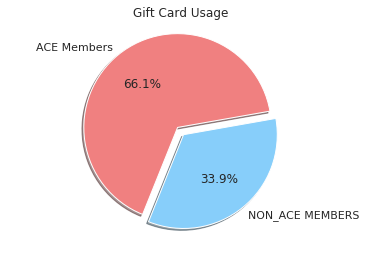

In [367]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'ACE Members', 'NON_ACE MEMBERS'
sizes = [gift_cards_ace.shape[0],gift_cards_nonace.shape[0]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=10)

plt.axis('equal')
plt.title('Gift Card Usage')
plt.show()

In [373]:
print(gift_cards_ace['Net Sales'].median())
print(gift_cards_nonace['Net Sales'].median())

-30.0
-50.0


In [83]:
exp = exp[exp['Department Name']!='GIFT CARD OFFSET (SPECL PROMO)']

In [84]:
save_ace = exp[exp['Loyalty ID']!="NaN"]
save_nonace = exp[exp['Loyalty ID']=="NaN"]

In [382]:
members_without_loyaltyID_given_reward_benefits = (exp[exp['Class Name']=='REWARDS CARD'][exp[exp['Class Name']=='REWARDS CARD']['Loyalty ID']=="NaN"])

In [85]:
ace_reward_claims = (exp[exp['Class Name']=='REWARDS CARD'][exp[exp['Class Name']=='REWARDS CARD']['Loyalty ID']!="NaN"])

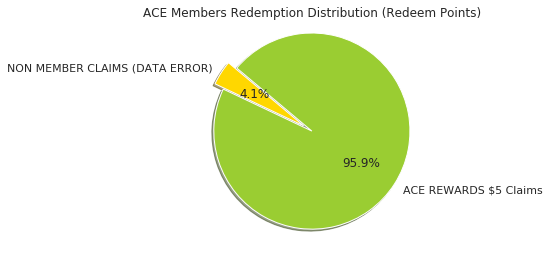

In [385]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'NON MEMBER CLAIMS (DATA ERROR)', 'ACE REWARDS $5 Claims'
sizes = [members_without_loyaltyID_given_reward_benefits.shape[0], ace_reward_claims.shape[0]]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('ACE Members Redemption Distribution (Redeem Points)')
plt.show()

In [86]:
res = ace_reward_claims.groupby(['Store #','Receipt Number']).agg({'Net Sales': 'sum'}).reset_index()

In [87]:
print(res)

       Store # Receipt Number  Net Sales
0            1         049027      -10.0
1            1         049084       -5.0
2            1         049209       -5.0
3            1         049265      -10.0
4            1         049297       -5.0
...        ...            ...        ...
298683       a         A90718       -5.0
298684       a         A90929       -5.0
298685       a         A90939      -15.0
298686       a         A90978      -10.0
298687       a         A90990       -5.0

[298688 rows x 3 columns]


In [88]:
ressave = res.groupby('Store #').agg({'Net Sales': 'sum'}).reset_index()
ressave['Net Sales'] = -ressave['Net Sales']

In [89]:
print(ressave)

   Store #  Net Sales
0        1    8836.74
1        2    3090.26
2        3   66194.79
3        4   37999.49
4        6  177362.50
5        7   46132.00
6        8  118980.00
7        9   90442.00
8        A   37387.00
9        B  234541.50
10       D    9685.00
11       E  131220.19
12       F   67615.25
13       G   45494.93
14       I   84048.50
15       J   62940.50
16       K   35068.00
17       L   33433.50
18       M   14521.00
19       O   72395.00
20       P    2325.00
21       Q   20115.00
22       R   59766.00
23       S   37617.00
24       T    5370.00
25       U   35297.00
26       V    7046.98
27       W   11849.80
28       X   73907.47
29       Y   77021.00
30       a    3405.00


No handles with labels found to put in legend.


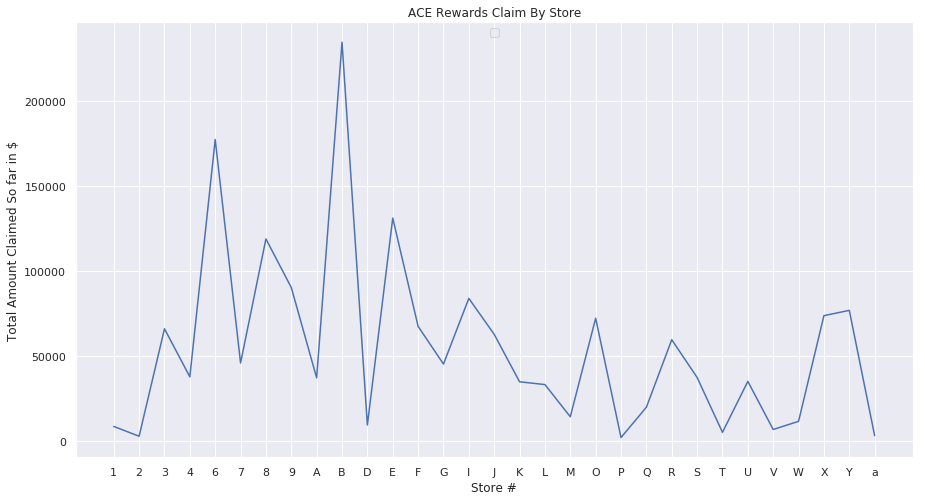

In [399]:
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt

ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="Store #", y="Net Sales", data=ressave)
ax.set_title('ACE Rewards Claim By Store')
ax.set_ylabel('Total Amount Claimed So far in $')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [90]:
numacebystore = ace_reward_claims.groupby(['Store #','Loyalty ID']).size().reset_index().rename(columns={0:'count'})
numacebystore = numacebystore.groupby('Store #').agg({'count': 'sum'}).reset_index()

In [91]:
print(numacebystore)
ressave['Norm'] = ressave['Net Sales']/numacebystore['count']
print(ressave)

   Store #  count
0        1   1609
1        2    427
2        3  12045
3        4   6583
4        6  31777
5        7   8503
6        8  21562
7        9  16468
8        A   6929
9        B  41201
10       D   1814
11       E  23668
12       F  12424
13       G   8311
14       I  15274
15       J  11396
16       K   6398
17       L   6084
18       M   2644
19       O  12969
20       P    167
21       Q   3532
22       R   9692
23       S   6661
24       T    904
25       U   6022
26       V   1149
27       W   1971
28       X  13390
29       Y  13333
30       a    539
   Store #  Net Sales       Norm
0        1    8836.74   5.492070
1        2    3090.26   7.237143
2        3   66194.79   5.495624
3        4   37999.49   5.772367
4        6  177362.50   5.581474
5        7   46132.00   5.425379
6        8  118980.00   5.518041
7        9   90442.00   5.491984
8        A   37387.00   5.395728
9        B  234541.50   5.692617
10       D    9685.00   5.339030
11       E  131220.19   5.54

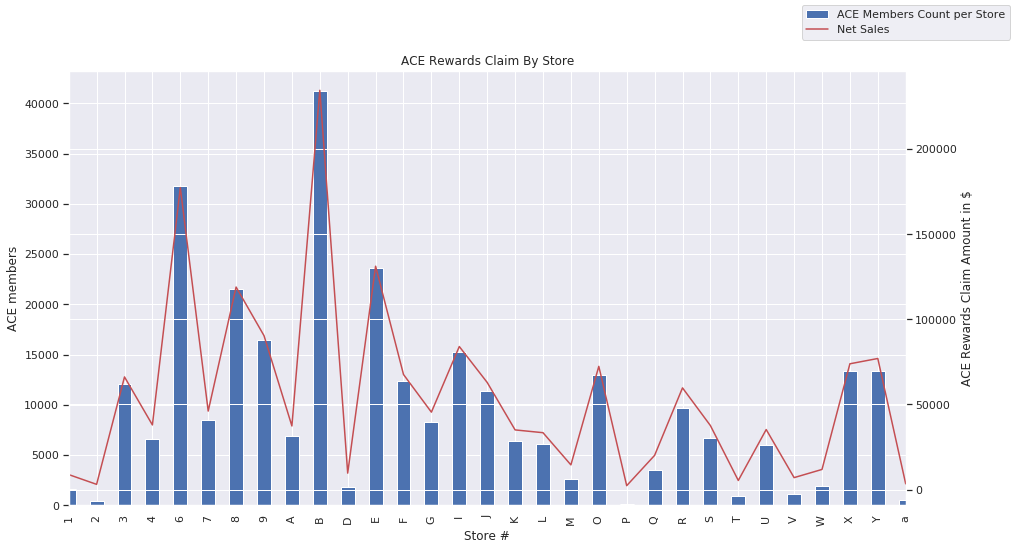

In [109]:
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt

ax = numacebystore.plot(x="Store #", y="count",kind = 'bar', legend=False,figsize=(15,8))
plt.ylabel('ACE members')
ax2 = ax.twinx()
ressave.plot(x="Store #", y="Net Sales",  ax=ax2, legend=False,color = 'r')
ax2.set_ylabel('ACE Rewards Claim Amount in $')
#ax.figure.legend()
L=ax.figure.legend()
L.get_texts()[0].set_text('ACE Members Count per Store')
ax.set_title('ACE Rewards Claim By Store')
plt.show()

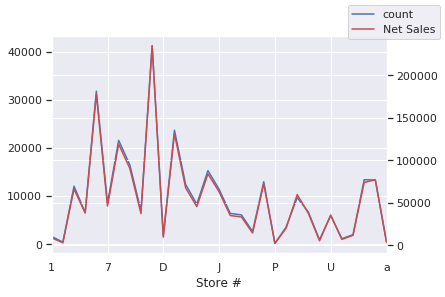

In [93]:
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt
ax = numacebystore.plot(x="Store #", y="count", legend=False)
ax2 = ax.twinx()
ressave.plot(x="Store #", y="Net Sales",  ax=ax2, legend=False,color = 'r')
ax.figure.legend()
plt.show()

No handles with labels found to put in legend.


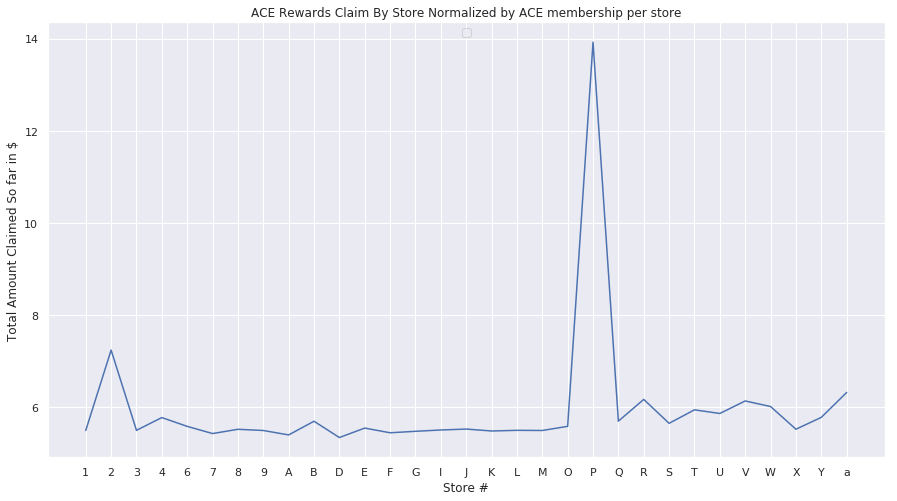

In [408]:
import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt

ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="Store #", y="Norm", data=ressave)
ax.set_title('ACE Rewards Claim per ACE member in each Store')
ax.set_ylabel('Total Amount Claimed So far in $')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [409]:
#As an ACE member how much do I save? compared to non_ace member

#exp is the base data set
save_ace = exp[exp['Loyalty ID']!="NaN"]
save_nonace = exp[exp['Loyalty ID']=="NaN"]

In [410]:
print(save_ace.shape,save_nonace.shape)

(1838681, 12) (159621, 12)


In [435]:
ace_by_store = save_ace.groupby('Store #').agg({'Net Sales': 'sum'}).reset_index()

In [436]:
ace_by_store['Net Sales'] = -ace_by_store['Net Sales']
ace_by_store['Type'] = "ACE"
ace_by_store

,Store #,Net Sales,Type
0,1,30587.44,ACE
1,2,15110.31,ACE
2,3,213893.50,ACE
3,4,138021.22,ACE
4,6,427631.40,ACE
5,7,178831.61,ACE
6,8,301667.04,ACE
7,9,304335.85,ACE
8,A,120773.74,ACE
9,B,567842.68,ACE


In [437]:
non_ace_by_store = save_nonace.groupby('Store #').agg({'Net Sales': 'sum'}).reset_index()
non_ace_by_store['Net Sales'] = - non_ace_by_store['Net Sales']
non_ace_by_store['Type'] = "NON_ACE"
print(non_ace_by_store)
result = pd.concat([ace_by_store, non_ace_by_store], axis=0, sort=False)

   Store #  Net Sales     Type
0        1    2760.55  NON_ACE
1        2    2458.48  NON_ACE
2        3   13669.56  NON_ACE
3        4   10132.40  NON_ACE
4        6   13688.94  NON_ACE
5        7   11098.50  NON_ACE
6        8    8709.91  NON_ACE
7        9   20368.28  NON_ACE
8        A   15086.93  NON_ACE
9        B   25944.18  NON_ACE
10       D    4973.91  NON_ACE
11       E    8354.36  NON_ACE
12       F   10269.45  NON_ACE
13       G   10101.28  NON_ACE
14       I   24549.67  NON_ACE
15       J   15280.86  NON_ACE
16       K    9389.50  NON_ACE
17       L   16673.88  NON_ACE
18       M    3759.92  NON_ACE
19       O    7388.78  NON_ACE
20       P      37.90  NON_ACE
21       Q    7591.98  NON_ACE
22       R   11450.47  NON_ACE
23       S   18839.08  NON_ACE
24       T    7603.13  NON_ACE
25       U   25971.54  NON_ACE
26       V    8180.40  NON_ACE
27       W    9722.76  NON_ACE
28       X   13691.17  NON_ACE
29       Y   46293.10  NON_ACE
30       a    7394.50  NON_ACE


In [438]:
result

,Store #,Net Sales,Type
0,1,30587.44,ACE
1,2,15110.31,ACE
2,3,213893.50,ACE
3,4,138021.22,ACE
4,6,427631.40,ACE
5,7,178831.61,ACE
6,8,301667.04,ACE
7,9,304335.85,ACE
8,A,120773.74,ACE
9,B,567842.68,ACE


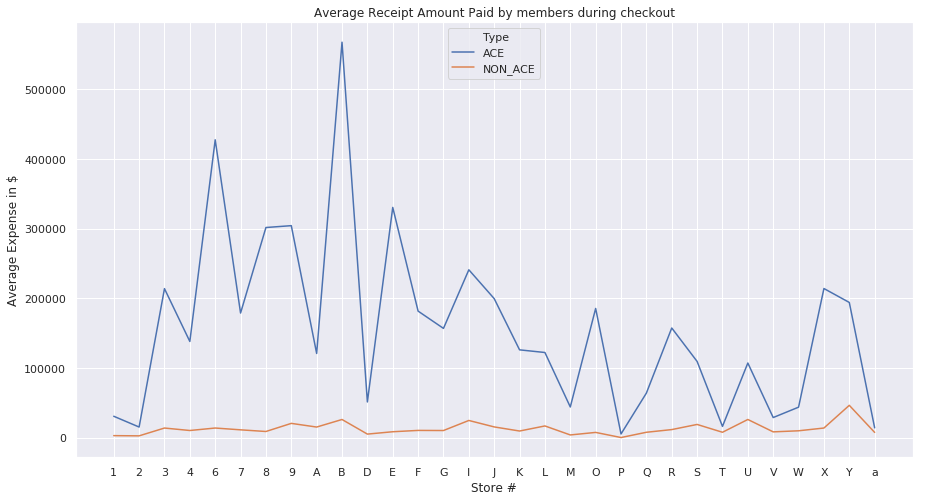

In [439]:
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="Store #", y="Net Sales",hue="Type", data=result)
ax.set_title('Average Receipt Amount Paid by members during checkout')
ax.set_ylabel('Average Expense in $')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [462]:
exp['Store #'].unique()

array(['I', '6', 'F', 'Y', '7', 'K', '1', 'L', '8', 'J', '4', 'B', '9',
       'E', 'A', 'X', '3', 'G', 'O', 'D', 'W', 'M', 'S', '2', 'P', 'U',
       'R', 'T', 'Q', 'V', 'a'], dtype=object)

In [464]:
grp = exp.groupby(by='Store #')
store_name = []
ace_members_count = []
non_ace_members_count = []
for name,val in grp:
    store_name.append(name)
    print(name,val[val['Loyalty ID']!="NaN"].shape[0],val[val['Loyalty ID']=="NaN"].shape[0])
    ace_members_count.append(val[val['Loyalty ID']!="NaN"].shape[0])
    non_ace_members_count.append(val[val['Loyalty ID']=="NaN"].shape[0])

1 11380 1190
2 4352 630
3 70230 4354
4 48464 4330
6 159691 5864
7 60601 3930
8 108915 3916
9 104275 6326
A 55046 6963
B 215054 11310
D 12037 1098
E 121453 3564
F 70286 4447
G 55335 3925
I 92408 9603
J 69616 5287
K 43052 3476
L 45310 5891
M 20634 2028
O 72073 3428
P 1206 325
Q 29831 4329
R 63101 6516
S 50226 8846
T 10712 5405
U 48852 7748
V 16013 5395
W 17797 3530
X 78296 4982
Y 73436 16223
a 8999 4762


In [465]:
print(len(ace_members_count),len(non_ace_members_count),len(store_name))

31 31 31


In [466]:
cnt = ace_members_count + non_ace_members_count
print(cnt)

[11380, 4352, 70230, 48464, 159691, 60601, 108915, 104275, 55046, 215054, 12037, 121453, 70286, 55335, 92408, 69616, 43052, 45310, 20634, 72073, 1206, 29831, 63101, 50226, 10712, 48852, 16013, 17797, 78296, 73436, 8999, 1190, 630, 4354, 4330, 5864, 3930, 3916, 6326, 6963, 11310, 1098, 3564, 4447, 3925, 9603, 5287, 3476, 5891, 2028, 3428, 325, 4329, 6516, 8846, 5405, 7748, 5395, 3530, 4982, 16223, 4762]


In [467]:
result['count'] = cnt

In [468]:
print(result)

   Store #  Net Sales     Type   count
0        1   30587.44      ACE   11380
1        2   15110.31      ACE    4352
2        3  213893.50      ACE   70230
3        4  138021.22      ACE   48464
4        6  427631.40      ACE  159691
5        7  178831.61      ACE   60601
6        8  301667.04      ACE  108915
7        9  304335.85      ACE  104275
8        A  120773.74      ACE   55046
9        B  567842.68      ACE  215054
10       D   51127.25      ACE   12037
11       E  330536.96      ACE  121453
12       F  181593.47      ACE   70286
13       G  156790.48      ACE   55335
14       I  240951.69      ACE   92408
15       J  199535.34      ACE   69616
16       K  125968.66      ACE   43052
17       L  122159.03      ACE   45310
18       M   43921.08      ACE   20634
19       O  185409.99      ACE   72073
20       P    5160.20      ACE    1206
21       Q   63861.62      ACE   29831
22       R  157350.77      ACE   63101
23       S  109322.05      ACE   50226
24       T   16026.46    

In [469]:
result['Norm'] = result['Net Sales']/result['count']

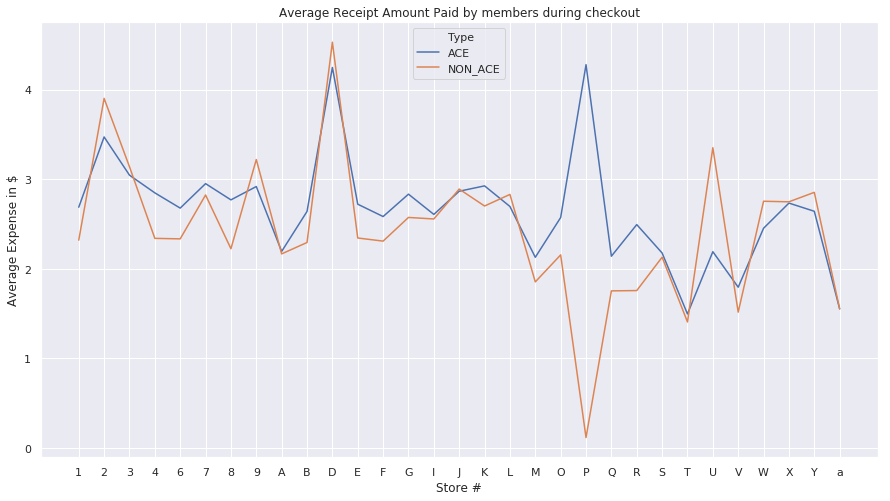

In [470]:
ax= plt.figure(figsize=(15,8))
ax = sns.lineplot(x="Store #", y="Norm",hue="Type", data=result)
ax.set_title('Average Receipt Amount Paid by members during checkout')
ax.set_ylabel('Average Expense in $')
ax.set_xlabel('Store #')
plt.legend(loc='upper center')

In [111]:
st = ['1', '2', '3', '4', '6', '7', '8', '9', 'A', 'B', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'a', 'z']
others = train_data[train_data['Store #'].isin!='D'][['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']]

In [112]:
import gc
del others
gc.collect()

8592

In [75]:
others = train_data[train_data['Store #']!='D']

142835399.62000003

In [76]:
others = train_data[train_data['Store #']!='D']

In [ ]:
train_data[train_data['Store #']!='D']['Gross Margin'].sum()

In [77]:
ace_d = others[others['Loyalty ID']!="NaN"]
nonace_d = others[others['Loyalty ID']=="NaN"]

In [79]:
print(ace_d['Gross Margin'].mean(),nonace_d['Gross Margin'].mean())

4.138639511134949 4.905610297661918


In [80]:
stored = train_data[train_data['Store #']=='D'][['Customer Number','Item Number','Receipt Number','Store #','Loyalty ID','Gross Margin', 'Gross Margin %']]

In [81]:
ace_d = stored[stored['Loyalty ID']!="NaN"]
nonace_d = stored[stored['Loyalty ID']=="NaN"]

In [82]:
print(ace_d['Gross Margin'].mean(),nonace_d['Gross Margin'].mean())

2.9707299447021516 1.7564480899765977
